#### Install all the packages

In [5]:
from __future__ import print_function
import pandas as pd
import numpy as np
from html.parser import HTMLParser
html_parser = HTMLParser()
from textblob import TextBlob
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from os import path
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud
import preprocessor as p
import logging
from sklearn.manifold import TSNE
import pickle
import cufflinks as cf
from gensim import corpora, models, similarities, matutils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, Birch, AgglomerativeClustering
import plotly.graph_objs as go
from sklearn.metrics.pairwise import cosine_similarity
import plotly.plotly as py
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jennifer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
%pylab inline
import numpy 
import matplotlib.pyplot as plt
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/jennifer/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [7]:
pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

height has been deprecated.



#### Read in pickle files

In [8]:
with open('/Users/jennifer/Desktop/metis/Project 4 Data/tweet_cln.pkl','rb') as picklefile:
    tweet_cln= pickle.load(picklefile)
with open('/Users/jennifer/Desktop/metis/Project 4 Data/tweet_str.pkl','rb') as picklefile:
    tweet_str = pickle.load(picklefile)
with open('/Users/jennifer/Desktop/metis/Project 4 Data/tweet_orig.pkl','rb') as picklefile:
    tweet_orig = pickle.load(picklefile)
# with open('tweet_cln_list.pkl','rb') as picklefile:
#     tweet_cln_list = pickle.load(picklefile)  

### Sentiment Analysis

In [9]:
#Open pickle file: 30,000 Tweets with Hashtag NRA
with open('/Users/jennifer/Desktop/metis/Project 4 Data/results_2018_02_26.pkl','rb') as picklefile:
    results_NRA = pickle.load(picklefile)
#Open pickle file: 30,000 Tweets with Hashtag gun
with open('/Users/jennifer/Desktop/metis/Project 4 Data/results_guns.pkl','rb') as picklefile:
    results_guns = pickle.load(picklefile)
with open('/Users/jennifer/Desktop/metis/Project 4 Data/results_guns2.pkl','rb') as picklefile:
    results_guns2 = pickle.load(picklefile)
with open('/Users/jennifer/Desktop/metis/Project 4 Data/results_NRA2.pkl','rb') as picklefile:
    results_NRA2 = pickle.load(picklefile)

In [10]:
results = results_NRA + results_NRA2 + results_guns + results_guns2

In [11]:
#Tweet_sent just removes the regular stop words, keeps punctuation, capitalization b/c valor sentiment analysis can interpret
# capitalization, punctuation, and emojis
with open('/Users/jennifer/Desktop/metis/Project 4 Data/tweet_sent.pkl','rb') as picklefile:
    tweet_sent= pickle.load(picklefile)

In [12]:
#This will create a dataframe for the tweets
import re
id_list=[tweet.id for tweet in results]
   
df=pd.DataFrame(id_list,columns=['id'])
df['tweet_text'] =[tweet for tweet in tweet_orig]
# df["Hashtags"]=[set(re.findall(r'(?i)\#\w+',str(tweet),flags=re.UNICODE)) for tweet in results]



#### Obtain hash tags

In [19]:
df_hash=pd.DataFrame(id_list,columns=['id'])
df_hash["Hashtags"]=[list(set(re.findall(r'(?i)\#\w+',str(tweet),flags=re.UNICODE))) for tweet in results]

In [20]:
for ind,i in enumerate(df['Hashtags']):

        if i != []:
            mylist = i
            myvalues = [i['text'] for i in mylist if 'text' in i]
            mytext = ','.join(myvalues)
#             hashtags.append(myvalues)
#             data['Hashtags1'] = myvalues
#             print(myvalues)
        else:
            mytext = ''
        df['Hashtags'][ind] = mytext

KeyError: 'Hashtags'

In [ ]:
#This is how the compound score is calculated, score = sum of the sentimental scores
def normalize(score, alpha=15):
    """
    Normalize the score to be between -1 and 1 using an alpha that
    approximates the max expected value
    """
    norm_score = score/math.sqrt((score*score) + alpha)
    return norm_score
#normalize(3.7)

In [13]:
sid = SentimentIntensityAnalyzer()

In [14]:
#Test case to check how it works, it will return negative, neutral and positive score, 
#compound is the normalize score of the sum of lexicon scores (look above)
pos_nltk = []
ss = sid.polarity_scores('We should all join the NRA just to piss off liberals. ')
pos_nltk.append(ss['pos'])
ss


{'compound': -0.128, 'neg': 0.194, 'neu': 0.647, 'pos': 0.158}

In [15]:
# sentiment analysis (positive, negative, neutral, compound)
pos_nltk = []
neg_nltk = []
neu_nltk = []
compound_nltk = []

# get sentiment scores for each review (original)
sid = SentimentIntensityAnalyzer()
for tweet in tweet_sent:
    ss = sid.polarity_scores(tweet)
    pos_nltk.append(ss['pos'])
    neg_nltk.append(ss['neg'])
    neu_nltk.append(ss['neu'])
    compound_nltk.append(ss['compound'])

In [16]:
# add sentiment analysis results to data frame
df['pos_nltk'] = pos_nltk
df['neg_nltk'] = neg_nltk
df['neu_nltk'] = neu_nltk
df['compound_nltk'] = compound_nltk
df["TimeZone"]=[tweet.user.time_zone for tweet in results]
df['combined_nltk'] = df.pos_nltk - df.neg_nltk

In [18]:
df.head()

id  \
0  968274478194184192   
1  968274478143741952   
2  968274478068150272   
3  968274477908922369   
4  968274477904736257   

                                                                                                                                                                                                                                     tweet_text  \
0   25 years ago terrorists attacked the World Trade Center for the first time. This was before the NRA became responsible fo…                                                                                                                    
1  Sorry but when did the NRA become a protected class? Because last I checked they are a lobby organization and as a private company Delta has the right to cut ties with them. Have fun on the unemployment line when your elections come up!   
2   Parkland shooting survivor rips into NRA's Dana Loesch                                                                                                                                                                                        
3   The #NRA and #GOP are accustomed to gun massacres fading out of the news cycle in short order. They rely on that ephemeralit…                                                                                                                 
4  Prime member for over 5 years asking you to keep your relationship with NRA #ResignIsrael #ObamaGate                                                                                                                                           

   pos_nltk  neg_nltk  neu_nltk  compound_nltk                    TimeZone  \
0  0.104     0.353     0.543    -0.7579         America/Chicago              
1  0.239     0.215     0.546     0.1779         Arizona                      
2  0.253     0.242     0.505     0.0258         Central Time (US & Canada)   
3  0.000     0.156     0.844    -0.3400         Pacific Time (US & Canada)   
4  0.000     0.000     1.000     0.0000         None                         

   combined  
0 -0.249     
1  0.024     
2  0.011     
3 -0.156     
4  0.000

#### Creating hash dataframe

In [13]:
df_hash['pos_nltk'] = pos_nltk
df_hash['neg_nltk'] = neg_nltk
df_hash['neu_nltk'] = neu_nltk
df_hash['compound_nltk'] = compound_nltk
    

NameError: name 'df_hash' is not defined

In [158]:
df_hash['combined_nltk'] = df['pos_nltk'] - df['neg_nltk']
df_hash['UserLoc'] = [tweet.user.location for tweet in results]

df_hash["retweet_ct"]=[tweet.retweet_count for tweet in results]
df_hash["favorite_ct"]=[tweet.favorite_count for tweet in results]
df_hash["pos_neg"] = ['Positive' if sentiment >= 0.20 else 'Negative' if sentiment <= -0.15 else 'Neutral' for sentiment in df.combined_nltk]

In [159]:
df_hash.head()

id                                          Hashtags  \
0  968274478194184192  {}                                                 
1  968274478143741952  {#fixitinpost, #postproductionlife, #NastyWoman}   
2  968274478068150272  {}                                                 
3  968274477908922369  {#GOP, #Parkland, #NRA}                            
4  968274477904736257  {#ResignIsrael, #ObamaGate}                        

   pos_nltk  neg_nltk  neu_nltk  compound_nltk  combined_nltk  \
0  0.104     0.353     0.543    -0.7579        -0.249           
1  0.239     0.215     0.546     0.1779         0.024           
2  0.253     0.242     0.505     0.0258         0.011           
3  0.000     0.156     0.844    -0.3400        -0.156           
4  0.000     0.000     1.000     0.0000         0.000           

             UserLoc  retweet_ct  favorite_ct   pos_neg  
0  Marlow, OK`        508         0            Negative  
1  San Francisco, CA  0           0            Neutral   
2  none               119         0            Neutral   
3                     539         0            Negative  
4  Chicago, IL        0           0            Neutral

#### Collect positive sentiment tweets *Threshold set at .20

In [17]:
positive_tweets = [tweet_cln[index] for index,sentiment in enumerate(df.combined_nltk) if sentiment >= 0.20]
len(positive_tweets)

14097

#### Obtain unique positive tweet array (exclude retweets)

In [18]:
pos = unique(positive_tweets)
len(pos)


3925

In [19]:
pos

array(['',
       "'bout scrap fundraiser rifle raffle prize especially consider yourself…",
       "'faith hope love help u include support murderous 1 lobbyist …",
       ..., '🇺🇸🇺🇸thanks follow support hooah',
       '🇺🇸🇺🇸we join today 🇺🇸🇺🇸 mid-term election progress value 2nd amendment right sure yo…',
       '🤣🤣🤣🤣 good salesman thank help maga guncontrol'], dtype='<U212')

In [209]:
pos_str = '.'.join(pos)

#### Collect negative sentiment tweets

In [210]:
negative_tweets = [tweet_cln[index] for index,sentiment in enumerate(df.combined_nltk) if sentiment <=-.15]

In [444]:
negative_tweets[0:5]

['25 year ago terrorist attack world trade center first time become responsible fo…',
 'gop accustom massacre fade news cycle short order rely ephemeralit…',
 'go anywhere pull ad attack member cry heart desire suspend my…',
 'today tallahassee deliver thousand petition receive last day reform s…',
 'coward israel stand failure firescottisrael']

In [537]:
#### Created this dataframe to retrieve the original tweet for examples

In [405]:
negative_tweets_whole = [tweet_orig[index] for index,sentiment in enumerate(df.combined_nltk) if sentiment <=-.15]
neg_whole  = unique(negative_tweets_whole)

In [442]:
len(neg_whole)

16981

In [445]:
df_test=pd.DataFrame(negative_tweets,columns=['cln'])

In [447]:
df_test['orig'] = negative_tweets_whole

In [455]:
df_test = df_test.drop_duplicates(subset='cln',keep='first')

In [454]:
neg = unique(negative_tweets)

len(neg)

16517

In [213]:
neg_str = ','.join(neg)

#### Obtain summary stats for each column

In [538]:
df[["combined_nltk", "pos_nltk", "neg_nltk", "neu_nltk", "compound_nltk"]].describe()

combined_nltk      pos_nltk      neg_nltk      neu_nltk  compound_nltk
count  96295.000000   96295.000000  96295.000000  96295.000000  96295.000000 
mean  -0.119882       0.131943      0.251825      0.614670     -0.243202     
std    0.276392       0.148945      0.182430      0.186821      0.515293     
min   -1.000000       0.000000      0.000000      0.000000     -0.991500     
25%   -0.316000       0.000000      0.124000      0.496000     -0.648600     
50%   -0.158000       0.099000      0.258000      0.606000     -0.340000     
75%    0.036000       0.217000      0.370000      0.732000      0.102700     
max    1.000000       1.000000      1.000000      1.000000      0.977400

In [131]:
df["pos_neg"] = ['Positive' if sentiment >= 0.20 else 'Negative' if sentiment <= -0.15 else 'Neutral' for sentiment in df.combined_nltk]

In [132]:
df_unique = df.drop_duplicates(subset='tweet_text', keep='first', inplace=False)

In [202]:
len(df_unique)

34455

In [539]:
df_unique[["combined_nltk", "pos_nltk", "neg_nltk", "neu_nltk", "compound_nltk"]].describe()

combined_nltk      pos_nltk      neg_nltk      neu_nltk  compound_nltk
count  34455.000000   34455.000000  34455.000000  34455.000000  34455.000000 
mean  -0.130550       0.140739      0.271288      0.587889     -0.274625     
std    0.282098       0.153195      0.191867      0.202480      0.512900     
min   -1.000000       0.000000      0.000000      0.000000     -0.991500     
25%   -0.323500       0.000000      0.136000      0.448000     -0.735100     
50%   -0.145000       0.115000      0.269000      0.571000     -0.340000     
75%    0.014000       0.225000      0.402000      0.714000      0.051600     
max    1.000000       1.000000      1.000000      1.000000      0.977400

#### Histogram of sentiment scores with positive and negative review thresholds

Text(0.5,1,'Tweet Counts by Sentiment Score')

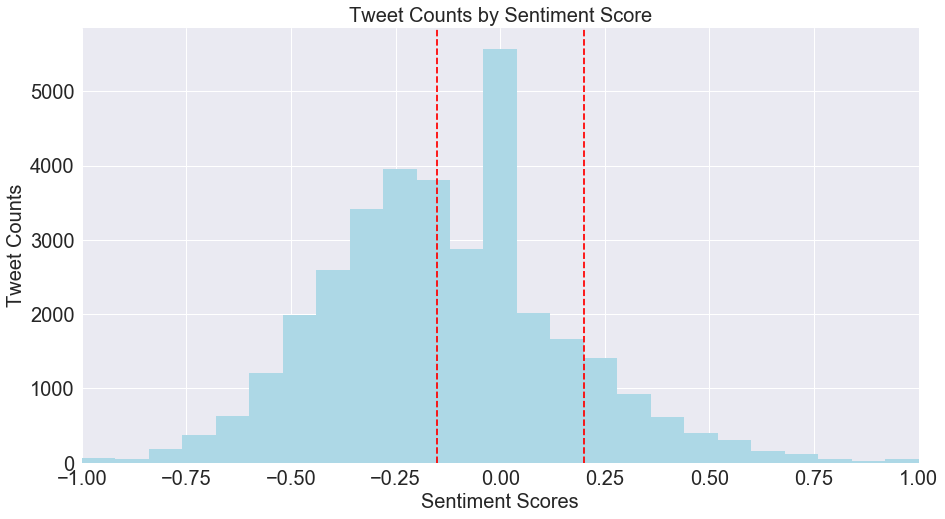

In [540]:
import seaborn as sns
plt.figure( figsize=(15,8))
sns.set(font_scale = 2)
sns.set_style('darkgrid')
plt.hist(df_unique.combined_nltk, bins=25,color='lightblue')
plt.axvline(x=-0.15, color="red",linestyle="dashed")
plt.axvline(x=0.20, color="red",linestyle="dashed")

# plt.text(0.55, 4000, "Positive", fontsize=13)
# plt.text(0.55, 3600, "Reviews", fontsize=13)
# plt.text(-0.7, 4000, "Negative", fontsize=13)
# plt.text(-0.7, 3600, "Reviews", fontsize=13)
plt.xlim(-1.0,1.0)
plt.xlabel("Sentiment Scores",fontsize=20)
plt.ylabel("Tweet Counts",fontsize=20)
plt.title("Tweet Counts by Sentiment Score",fontsize=20)

# plt.savefig("polarity_histogram.png", dpi=900);

#### Export CSV to import into Tablaeu

In [51]:
#df_unique.to_csv('/Users/jennifer/Desktop/Phan_Metis/Project 4/df_tweets_unique2.csv')

In [89]:
df_unique.sort_values(by='combined_nltk',ascending=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### Create Box Plot

[Text(0,0.5,'Sentiment Score'),
 Text(0.5,0,'Sentiments'),
 Text(0.5,1,'Sentiment Distribution')]

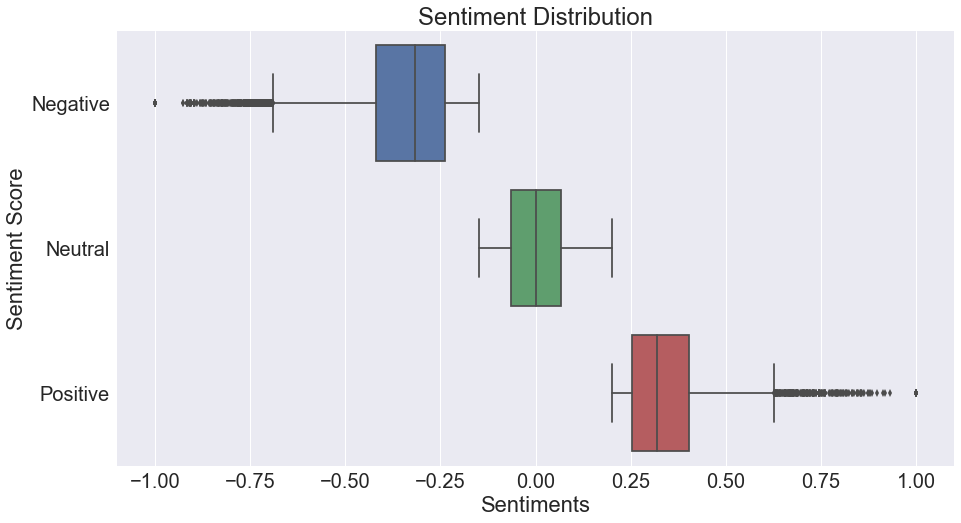

In [541]:

plt.figure(figsize=(15,8))
ax = sns.boxplot(x=df.combined_nltk,y=df.pos_neg,data=df)
# df.iplot(x=df.pos_neg,y=df.combined_nltk,kind='box')
#ax = sns.swarmplot(x=df.pos_neg, y=df.combined_nltk, data=df)
ax.set(xlabel='Sentiments', ylabel='Sentiment Score',title="Sentiment Distribution")
# ax = sns.swarmplot( data=df['pos_nltk'])

### Create a Word Cloud

#### Positive Word Cloud

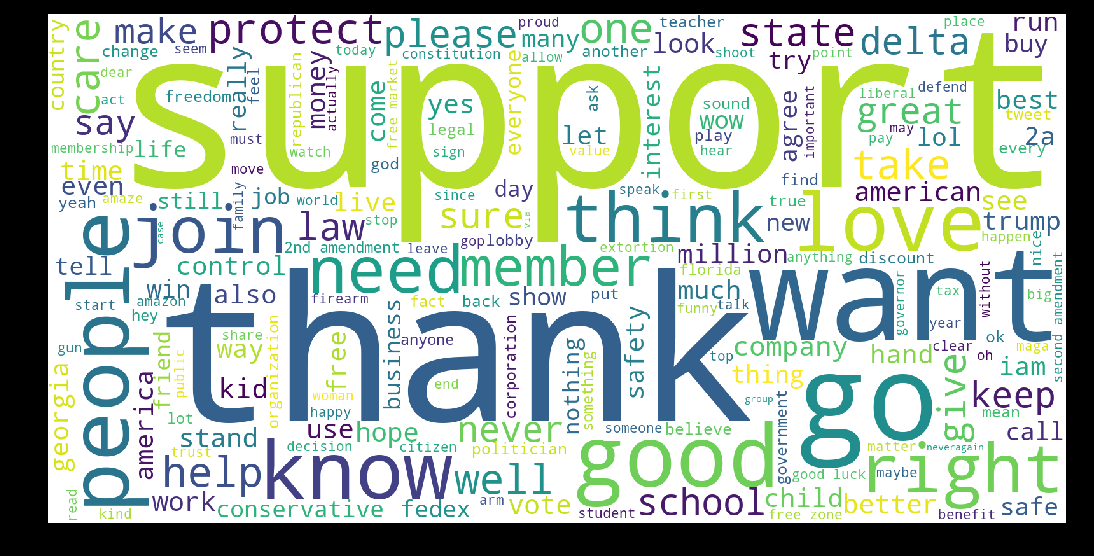

In [217]:
wordcloud = WordCloud(
        
                          background_color='white',
                          width=1600,
                          height=800).generate(pos_str)


plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


#### Negative Word Cloud

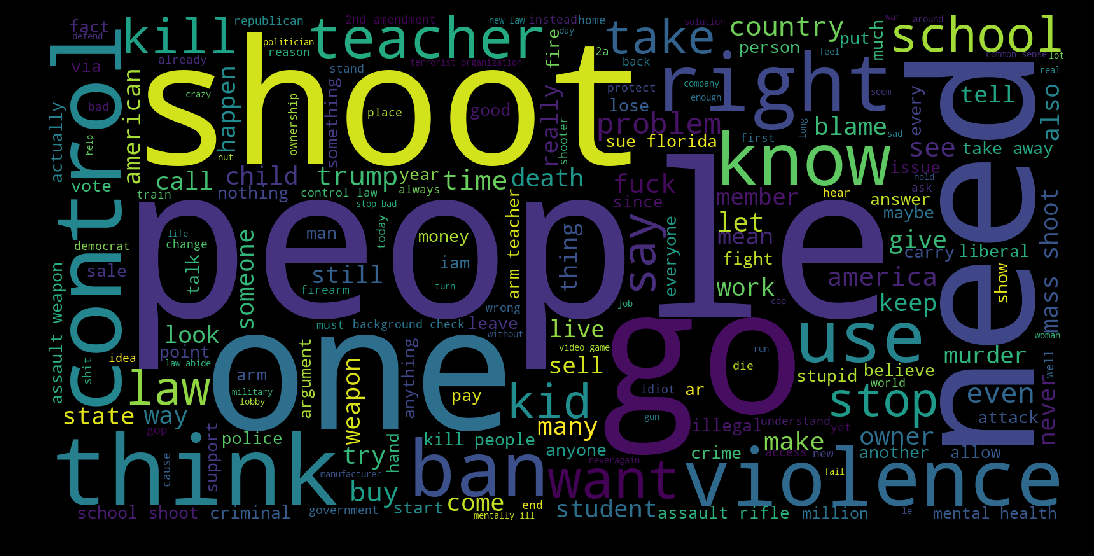

In [215]:
wordcloud = WordCloud(
        
                          background_color='black',
                          width=1600,
                          height=800).generate(neg_str)


plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Dimension Reduction

### PCA 

In [609]:
## Initialize model
ct_vec=CountVectorizer(min_df=100,ngram_range=(1,2))
## Fit the model
X = ct_vec.fit_transform(neg)

In [610]:
from sklearn.decomposition import RandomizedPCA

/Users/jennifer/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.



Text(0.5,1,'Cumulative Explained Variance')

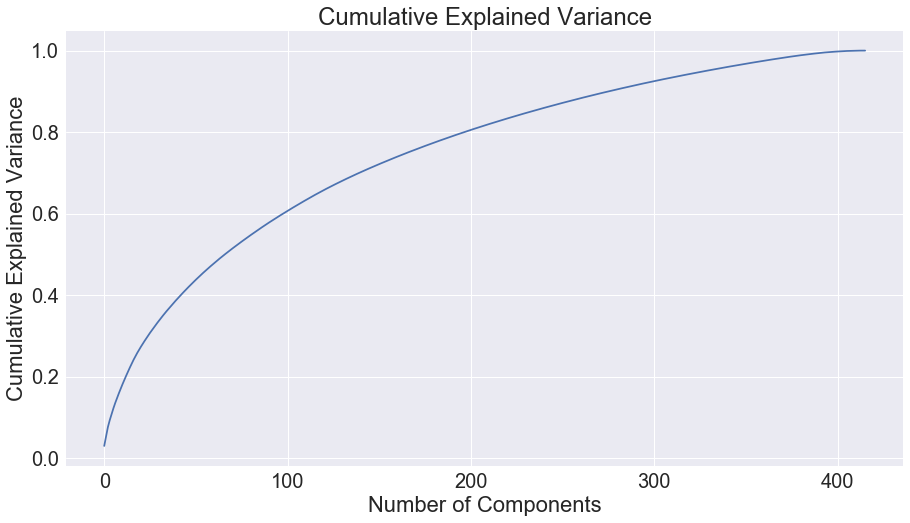

In [611]:
pca = RandomizedPCA().fit(X.toarray())
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

In [612]:
y_1 = np.cumsum(pca.explained_variance_ratio_)
y_2 = pca.explained_variance_ratio_

In [615]:
import plotly.tools as tls
trace1 = go.Scatter(
#     x=list(range(0,3000,500)),
    y= y_1,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
    hoverinfo= y_1,
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
#     x=list(range(3000)),
    y= y_2,
    mode='lines+markers',
    name="'Individual Explained Variance'",
    hoverinfo= y_2,
    line=dict(
        shape='linear',
        color = 'black'
        
    ),
    xaxis = dict(title='abc')
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
# fig.layout.xaxis = dict(range=[0, 3000])
# fig.layout.yaxis = dict(range=[0, 60])
fig['data'] += [go.Scatter( y=y_1, xaxis='x2', yaxis='y2', name = 'Cumulative Explained Variance')]
fig['data'] += [go.Scatter(y=y_2, xaxis='x2', yaxis='y2',name = 'Individual Explained Variance')]

# fig['data'] = data
# fig['layout'] = layout
# fig['data'] += data2
# fig['layout'] += layout2
py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



In [ ]:
pca = RandomizedPCA(n_components=150, whiten=True)

In [516]:
# Initialize models
vectorizer = CountVectorizer(min_df=100)
pca = RandomizedPCA(n_components=200, whiten=True)
km = KMeans(n_clusters=5, init='random', n_init=1, verbose=1)

# Fit models
X = vectorizer.fit_transform(neg)
X2 = pca.fit_transform(X.toarray())
km.fit(X2)

# # Predict with models
# X_new = vectorizer.transform(["hello world"])
# X2_new = pca.transform(X_new)
# km.predict(X2_new)

/Users/jennifer/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.



Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3320075.1015245253
start iteration
done sorting
end inner loop
Iteration 1, inertia 3309363.452518401
start iteration
done sorting
end inner loop
Iteration 2, inertia 3302854.7531028255
start iteration
done sorting
end inner loop
Iteration 3, inertia 3301281.6614440354
start iteration
done sorting
end inner loop
Iteration 4, inertia 3301002.1867032163
start iteration
done sorting
end inner loop
Iteration 5, inertia 3300918.6672842284
start iteration
done sorting
end inner loop
Iteration 6, inertia 3300807.7813269203
start iteration
done sorting
end inner loop
Iteration 7, inertia 3300751.2852151347
start iteration
done sorting
end inner loop
Iteration 8, inertia 3300702.2123515108
start iteration
done sorting
end inner loop
Iteration 9, inertia 3300653.224263087
start iteration
done sorting
end inner loop
Iteration 10, inertia 3300638.954739744
start iteration
done sorting
end inner loop
Iteration 

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [518]:
ns = np.arange(2, 20, 1)
inertias = []
silhouettes = []

for n in ns:
    km = KMeans(n_clusters=n, init="k-means++")
    km.fit(X2)
    inertias.append(km.inertia_)
    labels = km.labels_
    # only a sample was used to calculate silhouette score because of memory errors
    silhouettes.append(silhouette_score(X2, labels, metric='euclidean'))

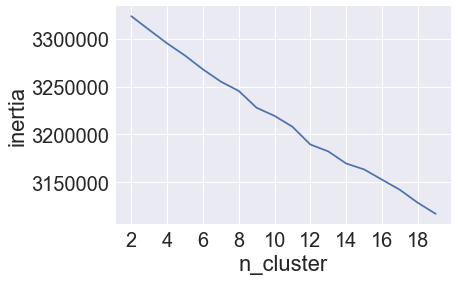

In [519]:
plt.plot(ns, inertias)
plt.xticks(np.arange(min(ns), max(ns)+1,2))
plt.xlabel('n_cluster')
plt.ylabel('inertia');

#### Create vectorizer

In [348]:
vec = TfidfVectorizer(min_df=.001,use_idf=True,ngram_range=(1,2))
X_neg = vec.fit_transform(neg)

In [349]:
vec.get_feature_names()

['000',
 '000 000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '15s',
 '16',
 '17',
 '17 kid',
 '18',
 '18 21',
 '18 year',
 '19',
 '1996',
 '1st',
 '20',
 '20 year',
 '200',
 '2016',
 '2017',
 '2018',
 '21',
 '21 buy',
 '21 year',
 '22',
 '24',
 '25',
 '26',
 '2a',
 '2nd',
 '2nd amendment',
 '2ndamendment',
 '30',
 '300',
 '300 million',
 '33',
 '39',
 '40',
 '45',
 '50',
 '500',
 '60',
 '80',
 '90',
 'abide',
 'abide citizen',
 'abide owner',
 'abiding',
 'ability',
 'able',
 'able buy',
 'abortion',
 'absolute',
 'absolutely',
 'absurd',
 'abuse',
 'abuse power',
 'accept',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accord',
 'account',
 'accuse',
 'acquire',
 'across',
 'act',
 'action',
 'active',
 'activist',
 'actor',
 'actual',
 'actually',
 'ad',
 'add',
 'add video',
 'address',
 'adept',
 'adept teacher',
 'administration',
 'admit',
 'adult',
 'advocate',
 'affect',
 'afford',
 'afraid',
 'age',
 'age 18',
 'age 21',
 'age buy',
 'age limit',
 'agenda

#### Find the optimal number of dimensions to reduce to 

In [337]:
X_neg.shape

(9113, 2114)

Text(0.5,1,'Cumulative Explained Variance')

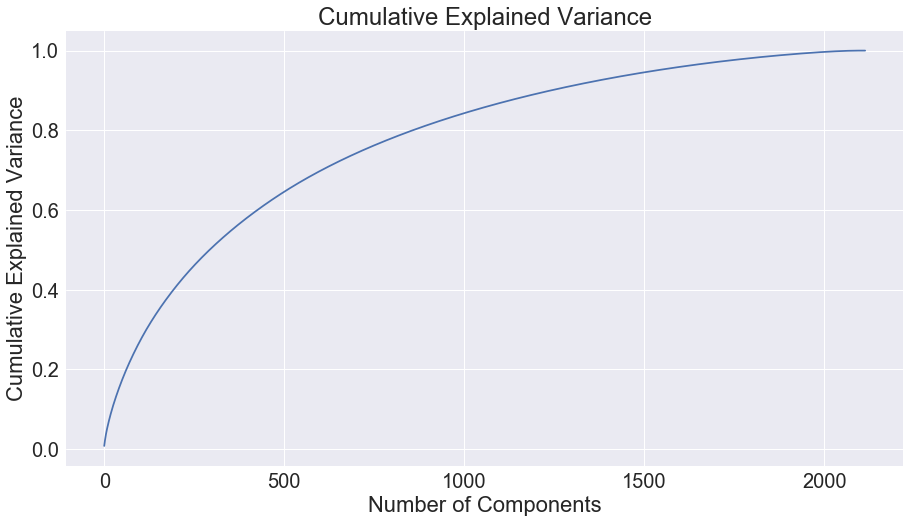

In [338]:
pca = PCA().fit(X_neg.toarray())
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

#### Using plotly to graph the cumulative explained variance

In [231]:
#100 features(dimensions) explains around 67% of the variance of the model
pca = PCA(n_components=100)
pca_neg_reduced = pca.fit_transform(X_neg.toarray())

In [232]:
components_pca = pca.components_

In [233]:
pca.explained_variance_ratio_

array([0.01873021, 0.01708543, 0.01413055, 0.0140459 , 0.01295626,
       0.01234944, 0.01172428, 0.01103142, 0.01059129, 0.01043564,
       0.0101232 , 0.00978364, 0.00975355, 0.00959036, 0.00930622,
       0.00910357, 0.00882905, 0.00871244, 0.00855929, 0.00834826,
       0.00830641, 0.00793272, 0.00784145, 0.00764647, 0.00759837,
       0.00746761, 0.00735814, 0.00730776, 0.00724395, 0.00713881,
       0.00700474, 0.00681462, 0.00676621, 0.00664412, 0.00659639,
       0.00646828, 0.0063748 , 0.00623082, 0.00617818, 0.00612885,
       0.00607292, 0.00601391, 0.00597568, 0.00595894, 0.00583949,
       0.00580195, 0.00572975, 0.00567385, 0.00562162, 0.00559371,
       0.00551946, 0.00548482, 0.00545925, 0.00538774, 0.00535143,
       0.00530791, 0.0052608 , 0.00522943, 0.0051827 , 0.00514133,
       0.00508495, 0.00500459, 0.00499882, 0.00496838, 0.00492091,
       0.00488916, 0.00484802, 0.00482744, 0.00478123, 0.0047452 ,
       0.00467412, 0.00462936, 0.00460596, 0.00457372, 0.00451

In [198]:
pca_neg_reduced.shape

(9113, 800)

In [740]:
pca = PCA(n_components=3)
pca_neg = pca.fit_transform(X_neg.toarray())
df_pca_neg = pd.DataFrame(pca_neg,columns=['pca-one','pca-two','pca-three'])
# df_pca_neg.shape

df_pca_neg['Cluster'] = neg_labels

In [741]:
len(df_pca_neg)

16517

In [742]:
pca.explained_variance_

array([0.0156921 , 0.01365316, 0.01315509])

In [616]:
trace1 = go.Scatter3d(
    x=df_pca_neg['pca-one'],
    y=df_pca_neg['pca-two'],
    z=df_pca_neg['pca-three'],
    mode='markers',
#     showlegend=True,
    marker=dict(
       size=12,
        
       color='lightblue',              # set color to an array/list of desired values
#        showlegend=True,   # choose a colorscale
       opacity=0.8
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='PCA Visualization', 
       scene = dict(
                    xaxis = dict(
                        title='Comp 1'),
                    yaxis = dict(
                        title='Comp 2'),
                    zaxis = dict(
                        title='Comp 3')))
        
#                     width=700,
#                     margin=dict(
#                     r=20, l=10,
#                     b=10, t=10)
           

fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

#### Check out the words that are included in the topic

In [164]:
for index,values in enumerate(components_pca):
    print("topic {}".format(index))
    temp = list(zip(neg_words, components_pca[index]))
    print(sorted(temp, key=lambda x: x[1], reverse=True)[:20],"\n")

topic 0
[('teacher', 0.5937644545216131), ('school', 0.32306594668182437), ('arm', 0.21172811294976956), ('shoot', 0.1755521096230436), ('arm teacher', 0.16530827448094904), ('problem', 0.13576369016481055), ('student', 0.12976764398489632), ('give', 0.12776234604327352), ('give teacher', 0.11008056650300302), ('violence', 0.1048482320433783), ('carry', 0.10354353080086091), ('trump', 0.10054503983556688), ('answer', 0.09999730400231881), ('solution', 0.0871333189094279), ('school shoot', 0.08110357245516328), ('kid', 0.07957036408215215), ('solve', 0.07726968417461111), ('train', 0.06766206020691112), ('idea', 0.06520515041381715), ('teacher carry', 0.056493374605221434)] 

topic 1
[('people', 0.5998281359959388), ('kill', 0.4590637872321306), ('kill people', 0.3288275673934332), ('people kill', 0.16196328452126416), ('shoot', 0.11631601098498535), ('teacher', 0.1111420077090385), ('people people', 0.10304227194212064), ('school', 0.09488782339143619), ('problem', 0.08371767265704155)

topic 16
[('fuck', 0.6001620108088613), ('want', 0.10595811979927093), ('cut', 0.09419173684928238), ('tie', 0.0921100355821999), ('cut tie', 0.09126852801999373), ('solution', 0.08913479397530659), ('one', 0.08756229741516197), ('take', 0.07048445529253253), ('idiot', 0.06736119674561483), ('stupid', 0.06521971995674908), ('people', 0.06431052516611419), ('death', 0.054298554209392315), ('country', 0.05188108622495526), ('fuck idiot', 0.05056715837152062), ('law', 0.04905804475425211), ('carry', 0.04838794697784297), ('shit', 0.04704969133768034), ('solution violence', 0.04544103753854163), ('school', 0.04140165995261414), ('america', 0.041250742203166754)] 

topic 17
[('go', 0.406329006117095), ('blame', 0.36624272031340444), ('trump', 0.34035799081166995), ('fuck', 0.26828482582319146), ('people', 0.20757092216443512), ('arm', 0.12615255558907035), ('want', 0.12085931575709981), ('stupid', 0.1059465407519549), ('think', 0.08908846657934512), ('arm teacher', 0.0801280137971419), ('go

topic 249
[('word', 0.1993445919104571), ('instead', 0.18721796608526856), ('resign', 0.15764622972269482), ('hard', 0.14786610732098257), ('speak', 0.12645012806576345), ('seem', 0.12453352901974082), ('corrupt', 0.1227327597840726), ('disgust', 0.12175943252505833), ('protect', 0.10565060056987692), ('fool', 0.10443575984820148), ('usa', 0.09271127789055898), ('ridiculous', 0.08580635671094972), ('action', 0.08335293070724527), ('lot', 0.07949799534546127), ('delta', 0.07895514789617729), ('punish', 0.07857398047654808), ('run', 0.07639920523095774), ('learn', 0.07451652172489877), ('parkland', 0.07243827476012356), ('man', 0.06959295112233789)] 

topic 250
[('town', 0.17285590794389824), ('hall', 0.13636599975127953), ('town hall', 0.1336830525802418), ('cnn', 0.11052406561459678), ('another', 0.1079396410918702), ('bully', 0.10588333968680802), ('word', 0.1011733616882485), ('pull', 0.0992827149996431), ('around', 0.09766160818211453), ('already', 0.09694329710934366), ('disgust', 


topic 608
[('11', 0.12640776689187722), ('grow', 0.12495580322521185), ('especially', 0.10554201717393108), ('equal', 0.10201641837204778), ('propose', 0.10086929604078446), ('bigger', 0.09913691430539266), ('miss', 0.09910110431763018), ('pathetic', 0.09519478884519093), ('decide', 0.09304438432899141), ('moment', 0.0880496274916622), ('view', 0.08007611452462242), ('period', 0.07576189033431638), ('sit', 0.07454775515975796), ('risk', 0.0744481530997432), ('give people', 0.07427750989585567), ('unstable', 0.073439286787234), ('obviously', 0.0703849164170717), ('level', 0.06860194742686483), ('worse', 0.06713961168336513), ('conceal', 0.0661590281936012)] 

topic 609
[('civil', 0.12251994703350753), ('effect', 0.10320135949381201), ('miss', 0.09634129395980506), ('society', 0.09486149436113694), ('handle', 0.09234962526536626), ('responsibility', 0.09034330192255051), ('backfire', 0.089320147067458), ('leftist', 0.08609976157588098), ('solve violence', 0.08591095221559279), ('list', 

### LSA

In [566]:
vec_lsa = TfidfVectorizer(min_df=.01,use_idf=True,ngram_range=(1,2))
X_neg = vec_lsa.fit_transform(neg)

In [572]:
# Fit LSA
lsa = TruncatedSVD(n_components=100,algorithm='randomized').fit(X_neg)

In [569]:
lsa.get_params

<bound method BaseEstimator.get_params of TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)>

In [573]:
lsa.explained_variance_ratio_

array([0.00753406, 0.01663625, 0.01451285, 0.01344898, 0.01303195,
       0.01199039, 0.01150859, 0.01024801, 0.00987255, 0.00976316,
       0.00949305, 0.00932449, 0.00915581, 0.00903503, 0.00889852,
       0.00854244, 0.00845006, 0.00838979, 0.0082584 , 0.0081768 ,
       0.00795242, 0.00780265, 0.00767917, 0.00743718, 0.00723589,
       0.00720116, 0.00716779, 0.00711524, 0.00696015, 0.0068774 ,
       0.00665484, 0.00645081, 0.00644336, 0.00631162, 0.00619155,
       0.00614765, 0.00606938, 0.00597693, 0.00595434, 0.00581087,
       0.0057797 , 0.00570393, 0.00564952, 0.00554263, 0.00549516,
       0.00547034, 0.00545103, 0.005421  , 0.00532285, 0.0053119 ,
       0.00526323, 0.00523557, 0.00515147, 0.00508627, 0.0050611 ,
       0.005055  , 0.00503254, 0.00501299, 0.0049448 , 0.00491571,
       0.00481199, 0.00481074, 0.00476458, 0.00472467, 0.00468844,
       0.00465982, 0.00462809, 0.00460774, 0.00456179, 0.00451108,
       0.00447871, 0.00446859, 0.00445694, 0.00444302, 0.00440

Text(0.5,1,'Cumulative Explained Variance')

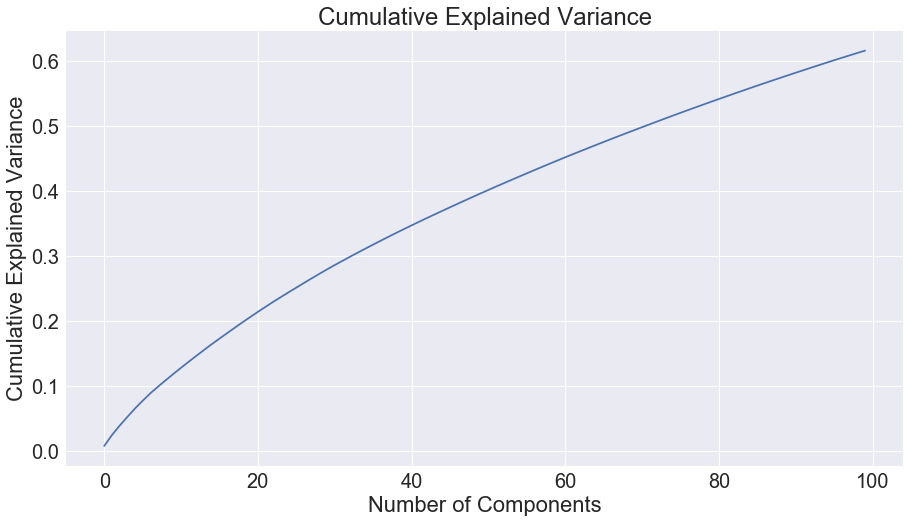

In [574]:
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

In [575]:
y_1 = np.cumsum(lsa.explained_variance_ratio_)
y_2 = lsa.explained_variance_ratio_

In [576]:
import plotly.tools as tls
trace1 = go.Scatter(
#     x=list(range(0,3000,500)),
    y= y_1,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
    hoverinfo= y_1,
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
#     x=list(range(3000)),
    y= y_2,
    mode='lines+markers',
    name="'Individual Explained Variance'",
    hoverinfo= y_2,
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
# fig.layout.xaxis = dict(range=[0, 3000])
# fig.layout.yaxis = dict(range=[0, 60])
fig['data'] += [go.Scatter( y=y_1, xaxis='x2', yaxis='y2', name = 'Cumulative Explained Variance')]
fig['data'] += [go.Scatter(y=y_2, xaxis='x2', yaxis='y2',name = 'Individual Explained Variance')]

# fig['data'] = data
# fig['layout'] = layout
# fig['data'] += data2
# fig['layout'] += layout2
py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



In [577]:
lsa = TruncatedSVD(n_components=100,algorithm='randomized',).fit(X_neg)

In [578]:
len(vec_lsa.get_feature_names())

251

In [579]:
#There are 100 components that are a linear combination of 232 words that appeared in at least 100 negative tweets
lsa_df = pd.DataFrame(lsa.components_.round(5),columns=vec_lsa.get_feature_names())
lsa_df.head()

15       18       21       2a      2nd  2nd amendment     able  \
0  0.02271  0.01996  0.02583  0.02309  0.02116  0.01666        0.02235   
1 -0.00454  0.01369  0.04070  0.00934  0.01434  0.01212       -0.00283   
2  0.00424  0.00506  0.00210  0.00402  0.00757  0.00647        0.00905   
3 -0.00710  0.00073  0.01392  0.00091  0.00495  0.00332       -0.00115   
4 -0.00651 -0.00758 -0.02778  0.00233  0.00006  0.00384       -0.00629   

    access  actually      age    allow  already     also   always  amendment  \
0  0.02756  0.02965   0.03417  0.02856  0.02575  0.04926  0.02549  0.03105     
1 -0.00659 -0.00153   0.04753 -0.00365  0.00415 -0.00320 -0.00746  0.02530     
2  0.00635  0.00291   0.00062  0.00528 -0.00264 -0.01004  0.00526  0.01183     
3  0.00581  0.00314   0.01838  0.00137  0.00080  0.00594  0.00532  0.01258     
4  0.00808  0.00077  -0.02849 -0.00441 -0.00274 -0.01398 -0.00026  0.00742     

   america  american  another   answer     anti   anyone  anything       ar  \
0  0.06421  0.05357   0.03880  0.05583  0.02165  0.04197  0.03078   0.02951   
1 -0.01848 -0.00030  -0.01182 -0.04015  0.00522 -0.00374 -0.00258  -0.00522   
2 -0.01147  0.02180  -0.00450 -0.05461 -0.00284  0.01760  0.00983   0.00870   
3  0.04989  0.02048   0.00280  0.03589  0.00049 -0.00961  0.00150  -0.00732   
4  0.03793  0.00311  -0.00580  0.02722  0.00312 -0.01086  0.00982  -0.00569   

   argument      arm  arm teacher   around      ask  assault  assault rifle  \
0  0.02879   0.09163  0.04010      0.02652  0.02465  0.06156  0.02495         
1 -0.00296  -0.07711 -0.04771     -0.00723  0.00043 -0.00086 -0.00018         
2  0.00911  -0.11379 -0.08387      0.00302 -0.00250  0.01919  0.00802         
3 -0.00079  -0.04752 -0.03111     -0.00685 -0.00105 -0.01203 -0.00833         
4  0.00908  -0.04012 -0.02400     -0.00157  0.00408 -0.01206 -0.00496         

   assault weapon   attack     away     back  background  background check  \
0  0.03172         0.03420  0.05367  0.03396  0.02359     0.02076            
1  0.00203        -0.00014 -0.00628 -0.00190  0.00339     0.00353            
2  0.00979         0.00014  0.02498  0.00117  0.00862     0.00793            
3 -0.00240         0.00442 -0.00699 -0.00368  0.00334     0.00217            
4 -0.00618        -0.01134  0.01775 -0.01124 -0.00339    -0.00400            

       bad      ban  believe     bill    blame    block  boycott    break  \
0  0.06659  0.12853  0.03928  0.03787  0.05191  0.02743  0.01743  0.02632   
1 -0.03796  0.01808 -0.01014  0.10817 -0.01219  0.10779  0.00474  0.04073   
2  0.00642  0.04935  0.00722 -0.02203  0.01401 -0.01335  0.00612 -0.00007   
3 -0.00320  0.00340  0.00765  0.01030  0.01278  0.03910 -0.00224  0.01156   
4 -0.00610  0.03888  0.01239 -0.01003  0.00063 -0.05502  0.00977 -0.02522   

     bring      buy     call    carry    cause   change    check    child  \
0  0.02599  0.07858  0.04970  0.05453  0.03111  0.04153  0.03353  0.07284   
1 -0.00883  0.01213  0.00708 -0.03745 -0.01325  0.02328  0.00274 -0.03388   
2 -0.01557  0.02710 -0.00769 -0.05746  0.00126  0.01364  0.01302 -0.00267   
3  0.00305  0.01155  0.00704 -0.04127  0.02437  0.01408  0.00188 -0.00653   
4 -0.00718 -0.03935  0.02728 -0.03042  0.00537 -0.02064 -0.00332 -0.01297   

   citizen     come   common  company  conservative  control  control law  \
0  0.03431  0.05034  0.02681  0.01919  0.01763       0.22913  0.03637       
1  0.03190  0.00114  0.01803  0.00138 -0.00279       0.35597  0.11823       
2  0.01123 -0.00468  0.00443  0.00677  0.00748      -0.01510 -0.00681       
3  0.01398  0.01325  0.00699  0.00289  0.00505      -0.32425 -0.00640       
4 -0.00559  0.00839 -0.00348 -0.00397  0.00154       0.79189  0.02582       

     could  country    crazy    crime  criminal      cut      day     dead  \
0  0.05070  0.07228  0.02637  0.04321  0.05133   0.01504  0.03386  0.02665   
1 -0.02004  0.00289 -0.01036  0.00283  0.03347   0.00431  0.00202 -0.00859   
2 -0.00558 -0.00010  0.00391  0.00536  0

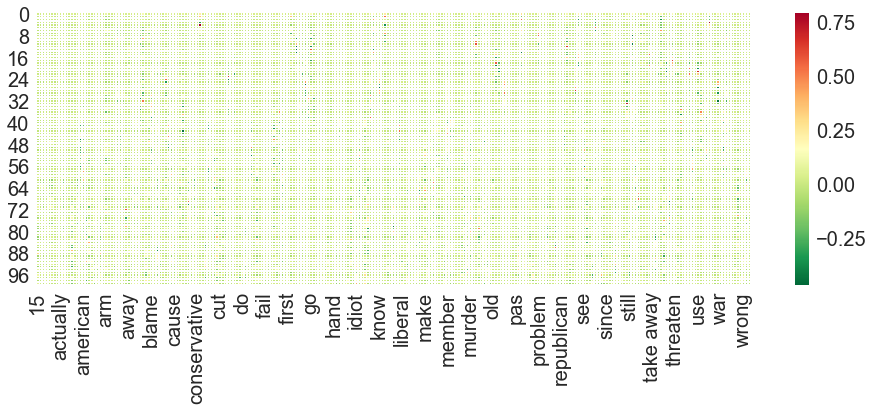

In [581]:
plt.figure(figsize = (16,5))
sns.heatmap(lsa_df, cmap='RdYlGn_r', linewidths=0.5)

#### Word2Vec Visualization

In [20]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)    
           
    return corpus

In [3]:
pos

NameError: name 'pos' is not defined

In [21]:
corpus = build_corpus(pos)   


In [22]:
corpus

[[''],
 ["'bout",
  'scrap',
  'fundraiser',
  'rifle',
  'raffle',
  'prize',
  'especially',
  'consider',
  'yourself…'],
 ["'faith",
  'hope',
  'love',
  'help',
  'u',
  'include',
  'support',
  'murderous',
  '1',
  'lobbyist',
  '…'],
 ["'god",
  'bless',
  'tide',
  'pod',
  'eat',
  'antigod',
  'leftist',
  'communist',
  'strengthen',
  'resolve',
  'know',
  'do…'],
 ["'value",
  'grade',
  'lobby',
  'org',
  'give',
  'candidate',
  'wouldo',
  'want',
  'seriously',
  'lobbyist',
  'manufacturer',
  'grade',
  'candidate',
  'something',
  "'value",
  'wow'],
 ['1',
  'age',
  'well',
  '4',
  'hour',
  'old',
  '2',
  'might',
  'wan',
  'na',
  'talk',
  'attorney',
  '3',
  'gon',
  'na',
  'nice',
  'epitaph',
  'political',
  'career'],
 ['1', 'cancel', 'membership', 'rave', 'best', 'interest', 'the…'],
 ['1',
  'care',
  '2',
  'care',
  '3',
  'care',
  '4',
  'care',
  '5',
  'care',
  '5',
  'thing',
  'learn',
  'politics',
  'last',
  '24',
  'hour'],
 ['1',

In [23]:
from gensim.models import word2vec
# run the model
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=80, workers=4)

2018-03-31 23:33:30,570 : INFO : collecting all words and their counts
2018-03-31 23:33:30,576 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-03-31 23:33:30,631 : INFO : collected 6544 word types from a corpus of 36527 raw words and 3925 sentences
2018-03-31 23:33:30,633 : INFO : Loading a fresh vocabulary
2018-03-31 23:33:30,641 : INFO : min_count=80 retains 63 unique words (0% of original 6544, drops 6481)
2018-03-31 23:33:30,644 : INFO : min_count=80 leaves 8728 word corpus (23% of original 36527, drops 27799)
2018-03-31 23:33:30,648 : INFO : deleting the raw counts dictionary of 6544 items
2018-03-31 23:33:30,656 : INFO : sample=0.001 downsamples 63 most-common words
2018-03-31 23:33:30,658 : INFO : downsampling leaves estimated 2694 word corpus (30.9% of prior 8728)
2018-03-31 23:33:30,661 : INFO : estimated required memory for 63 words and 100 dimensions: 81900 bytes
2018-03-31 23:33:30,664 : INFO : resetting layer weights
2018-03-31 23:33:30,669 

{'also': <gensim.models.keyedvectors.Vocab at 0x1648bd860>,
 'amendment': <gensim.models.keyedvectors.Vocab at 0x1648a5278>,
 'american': <gensim.models.keyedvectors.Vocab at 0x16489eb00>,
 'best': <gensim.models.keyedvectors.Vocab at 0x16488e6d8>,
 'better': <gensim.models.keyedvectors.Vocab at 0x1648a5b00>,
 'care': <gensim.models.keyedvectors.Vocab at 0x1648962b0>,
 'child': <gensim.models.keyedvectors.Vocab at 0x1648c5358>,
 'come': <gensim.models.keyedvectors.Vocab at 0x1648c5be0>,
 'company': <gensim.models.keyedvectors.Vocab at 0x1648b6ef0>,
 'delta': <gensim.models.keyedvectors.Vocab at 0x16489eb70>,
 'discount': <gensim.models.keyedvectors.Vocab at 0x1648ca278>,
 'even': <gensim.models.keyedvectors.Vocab at 0x1648ab940>,
 'free': <gensim.models.keyedvectors.Vocab at 0x1648b6e80>,
 'georgia': <gensim.models.keyedvectors.Vocab at 0x1648b6da0>,
 'give': <gensim.models.keyedvectors.Vocab at 0x16488e7b8>,
 'good': <gensim.models.keyedvectors.Vocab at 0x164896f60>,
 'great': <gensim

In [24]:
from adjustText import adjust_text

In [25]:
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=3, n_iter=2500)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
   
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 10)) 
    for i in range(50):
        plt.scatter(x[i],y[i],color='blue')
        
    
#         texts = [plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(10, 2),
#                      textcoords='offset points',
#                      ha='center',
#                      va='center',
                     
#                     fontsize=10)]
        texts = [plt.text(x[i], y[i],
                     labels[i],
#                      xytext=(10, 2),
#                      textcoords='offset points',
                     ha='center',
                     va='bottom',
                     fontsize=15)]
        adjust_text(texts,arrowprops=dict(arrowstyle='->', color='red',lw=.5))
    plt.show()
    
# call the function on our dataset



/Users/jennifer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



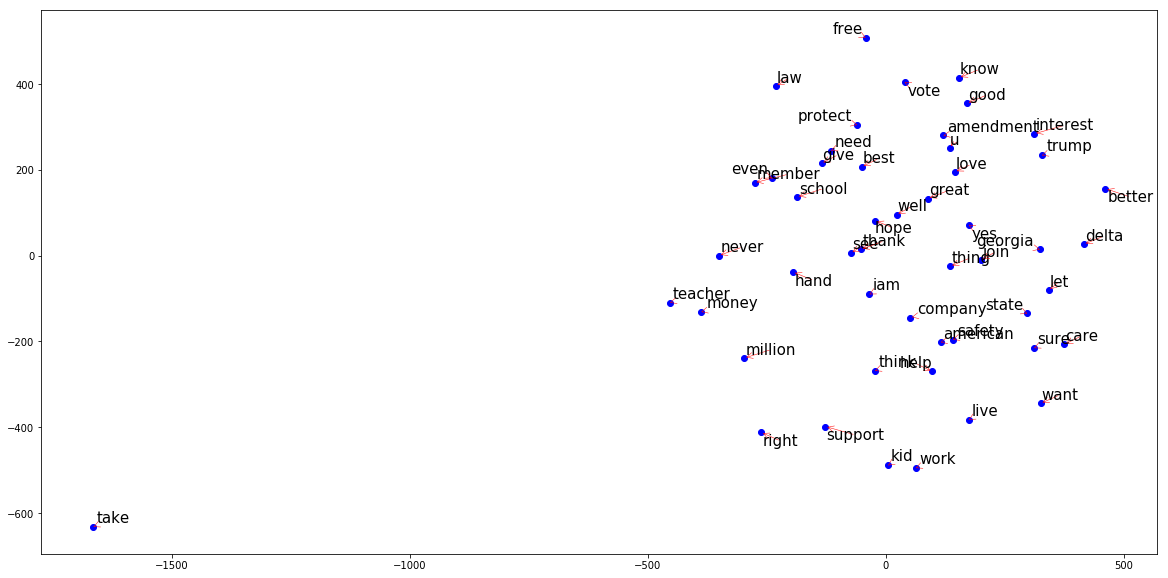

In [26]:
tsne_plot(model)

In [729]:
model_pos = word2vec.Word2Vec(corpus_pos, size=100, window=5, min_count=50, workers=3)

2018-03-11 14:10:29,901 : INFO : collecting all words and their counts
2018-03-11 14:10:29,905 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-03-11 14:10:29,922 : INFO : collected 6565 word types from a corpus of 37640 raw words and 3929 sentences
2018-03-11 14:10:29,925 : INFO : Loading a fresh vocabulary
2018-03-11 14:10:29,931 : INFO : min_count=50 retains 134 unique words (2% of original 6565, drops 6431)
2018-03-11 14:10:29,936 : INFO : min_count=50 leaves 13697 word corpus (36% of original 37640, drops 23943)
2018-03-11 14:10:29,941 : INFO : deleting the raw counts dictionary of 6565 items
2018-03-11 14:10:29,949 : INFO : sample=0.001 downsamples 134 most-common words
2018-03-11 14:10:29,951 : INFO : downsampling leaves estimated 6686 word corpus (48.8% of prior 13697)
2018-03-11 14:10:29,955 : INFO : estimated required memory for 134 words and 100 dimensions: 174200 bytes
2018-03-11 14:10:29,958 : INFO : resetting layer weights
2018-03-11 14:10:2

/Users/jennifer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



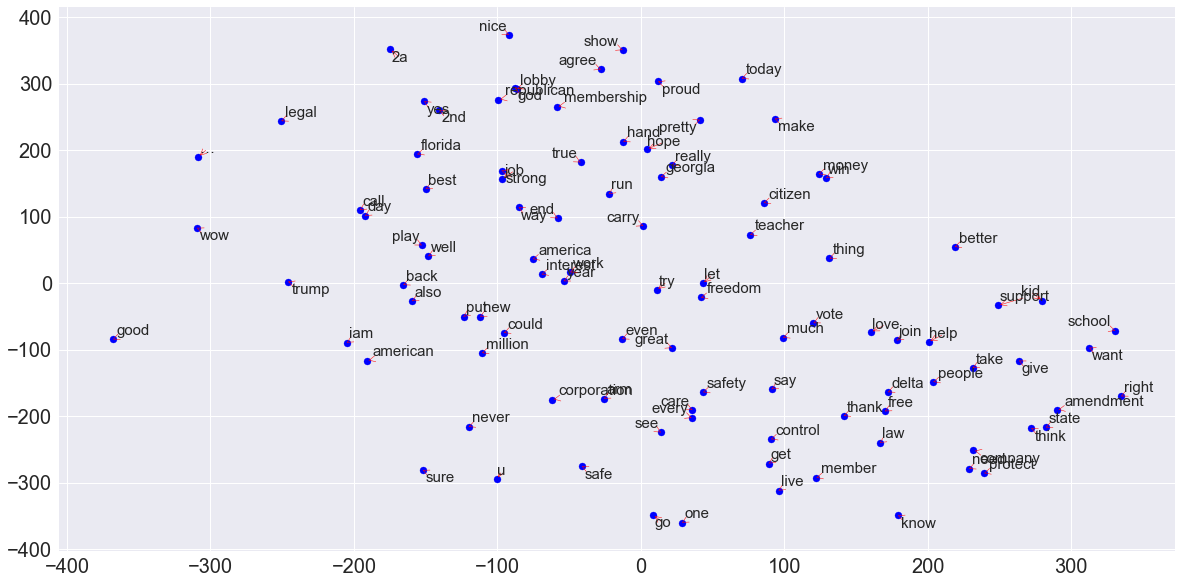

In [732]:
tsne_plot(model_pos)

## Topic Modeling

In [655]:
neg_words = vec.get_feature_names()
len(neg_words)
# pos_words

2077

In [656]:
X_neg.shape

(16517, 251)

#### Non-Negative Matrix Factorization

In [699]:
vec = TfidfVectorizer(min_df=.01,use_idf=True,ngram_range=(1,2))
X_neg = vec.fit_transform(neg)
X_pos = vec.fit_transform(pos)

In [700]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
nmf = NMF(n_components=5, init='nndsvd')
X_neg_reduced = nmf.fit_transform(X_neg)
X_pos_reduced = nmf.fit_transform(X_pos)
components = nmf.components_

print(components)

[[9.57556926e-02 1.74565586e-01 1.37424852e-01 2.05086508e-01
  2.01468735e-01 2.89455505e-01 1.92545082e-01 2.69992139e-01
  1.27472767e-01 1.52879137e-01 2.94239511e-01 9.51869488e-02
  1.70373293e-01 1.82019935e-01 1.91088057e-01 2.49345738e-01
  2.92744324e-01 9.26785717e-02 1.18343471e-01 1.41995245e-01
  2.03551496e-01 1.63922905e-01 5.76237180e-01 1.83314024e-01
  1.54889478e-01 3.91208327e-01 1.36200660e-01 9.63162878e-02
  2.78618329e-01 1.40150901e-01 1.78097416e-01 1.18098064e-01
  2.08167304e-01 1.27367752e-01 1.58777465e-01 1.65106575e-01
  1.17705367e-01 7.47700381e-02 3.54422882e-01 8.40511191e-02
  7.20479315e-02 3.14108810e-01 1.63130981e-01 1.29411760e-01
  1.37324829e-01 3.76878925e-02 1.91795820e-01 1.08271091e-01
  1.71445495e-01 1.48736115e-01 7.34585396e-01 1.63094837e-01
  1.34533445e-01 2.04897545e-01 3.54112904e-01 3.58375663e-01
  9.27656204e-01 1.74668059e-01 0.00000000e+00 0.00000000e+00
  1.38432867e-01 1.83181774e-01 1.20427511e-01 4.00992323e-01
  9.8356

In [674]:
X_neg_reduced.shape

(16517, 5)

#### Topics from the negative sentiment

In [701]:
for index,values in enumerate(components):
    print("topic {}".format(index))
    temp = list(zip(neg_words, components[index]))
    print(sorted(temp, key=lambda x: x[1], reverse=True)[:20],"\n")

topic 0


NameError: name 'pos_words' is not defined

In [702]:
def get_nmf_topics(model,num_topics):
    feat_names=vec.get_feature_names()
    word_dict = {};
    for i in range(num_topics):
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    return pd.DataFrame(word_dict);

In [707]:
df_pos = get_nmf_topics(nmf,4)
df_pos
# df_neg.to_csv('/Users/jennifer/Desktop/Phan_Metis/Project 4/df_neg.csv')

Topic # 01  Topic # 02    Topic # 03  Topic # 04
0   want       thank       support       join      
1   go         stand       company       member    
2   right      god         2a            discount  
3   well       membership  show          give      
4   love       please      fedex         million   
5   people     right       right         freedom   
6   free       best        please        2a        
7   know       business    decision      lol       
8   think      yes         call          today     
9   care       great       delta         fedex     
10  protect    use         bill          stand     
11  school     clear       help          time      
12  state      look        end           proud     
13  one        georgia     control       take      
14  need       time        american      membership
15  take       need        organization  new       
16  help       take        trump         protect   
17  sure       today       back          year      
18  law        new         use           everyone  
19  trump      sign        tax           iam

### LDA 

In [270]:
count_vectorizer = CountVectorizer(ngram_range=(1,2),stop_words='english',token_pattern='\\b[a-z][a-z]+\\b')

count_vectorizer.fit(neg)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [271]:
#Create the term-document matrix and transpose so the terms are the rows
counts = count_vectorizer.transform(neg).transpose()

#### Convert to gensim

In [272]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)

In [273]:
corpus

#### Mapping matrix rows to tokens : Creating dictionary

In [300]:
#We need to save a mapping (dict) of row id to word (token) for later use by gensim:
id2word = dict((v,k) for k,v in count_vectorizer.vocabulary_.items())

In [301]:
id2word

{1714: 'adding',
 41061: 'gasoline',
 72676: 'oilpatch',
 52532: 'investor',
 62574: 'lure',
 99374: 'south',
 70247: 'new',
 105259: 'tax',
 90755: 'rule',
 16280: 'cbc',
 70424: 'news',
 1715: 'adding gasoline',
 41065: 'gasoline oilpatch',
 72677: 'oilpatch investor',
 52534: 'investor lure',
 62575: 'lure south',
 99389: 'south new',
 70391: 'new tax',
 105306: 'tax rule',
 90762: 'rule cbc',
 16281: 'cbc news',
 21202: 'conservative',
 92082: 'say',
 43591: 'gun',
 71587: 'nut',
 56152: 'kook',
 62524: 'lunatic',
 64322: 'mass',
 68649: 'murdered',
 63476: 'making',
 120727: 'ya',
 113563: 'use',
 44825: 'happen',
 66209: 'mf',
 120242: 'worth',
 85553: 'really',
 104198: 'sure',
 104870: 'talk',
 7593: 'automatic',
 117906: 'weapon',
 59484: 'license',
 44496: 'hand',
 53431: 'jeech',
 116469: 'wakey',
 21302: 'conservative say',
 92248: 'say gun',
 43661: 'gun nut',
 71638: 'nut kook',
 56154: 'kook lunatic',
 62543: 'lunatic mass',
 64343: 'mass murdered',
 68651: 'murdered mak

In [678]:
lda = models.LdaModel(corpus=corpus, num_topics=5, minimum_probability=.05, id2word=id2word,passes=10)

2018-03-11 13:21:52,116 : INFO : using symmetric alpha at 0.2
2018-03-11 13:21:52,122 : INFO : using symmetric eta at 0.2
2018-03-11 13:21:52,154 : INFO : using serial LDA version on this node
2018-03-11 13:21:55,926 : INFO : running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 16517 documents, updating model once every 2000 documents, evaluating perplexity every 16517 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-11 13:21:55,971 : INFO : PROGRESS: pass 0, at document #2000/16517


KeyboardInterrupt: 

In [679]:
def get_lda_topics(model,num_topics):
    word_dict = {};
    for i in range(num_topics):
  
        words = model.show_topic(i,topn=10);
  
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
#         print(word_dict)
    return pd.DataFrame(word_dict)

In [681]:
get_lda_topics(lda,5)

Topic # 01 Topic # 02 Topic # 03 Topic # 04 Topic # 05
0  florida      bad        school     people     law      
1  sue          stop       teacher    kill       weapon   
2  control      good       shoot      problem    florida  
3  new          member     law        need       age      
4  state        money      people     right      trump    
5  right        pay        violence   think      video    
6  law          owner      stop       control    ban      
7  shoot        terrorist  want       weapon     control  
8  sue florida  fuck       control    mental     assault  
9  violence     guy        kid        know       game

In [398]:
lda.print_topics()

2018-03-09 15:14:52,177 : INFO : topic #0 (0.200): 0.006*"bad" + 0.006*"stop" + 0.006*"good" + 0.006*"shoot" + 0.005*"kid" + 0.005*"school" + 0.004*"guy" + 0.003*"stop bad" + 0.003*"control" + 0.003*"violence"
2018-03-09 15:14:52,182 : INFO : topic #1 (0.200): 0.005*"delta" + 0.004*"georgia" + 0.004*"company" + 0.003*"tie" + 0.003*"cut" + 0.003*"member" + 0.003*"tax" + 0.003*"threaten" + 0.003*"trump" + 0.003*"use"
2018-03-09 15:14:52,185 : INFO : topic #2 (0.200): 0.018*"teacher" + 0.013*"people" + 0.012*"school" + 0.010*"kill" + 0.009*"shoot" + 0.006*"need" + 0.005*"arm" + 0.005*"ban" + 0.005*"want" + 0.004*"think"
2018-03-09 15:14:52,190 : INFO : topic #3 (0.200): 0.004*"trump" + 0.003*"use" + 0.003*"right" + 0.002*"control" + 0.002*"need" + 0.002*"know" + 0.002*"blame" + 0.002*"make" + 0.002*"sell" + 0.002*"shoot"
2018-03-09 15:14:52,194 : INFO : topic #4 (0.200): 0.011*"problem" + 0.009*"law" + 0.009*"people" + 0.008*"violence" + 0.006*"control" + 0.005*"think" + 0.004*"solve" + 0

[(0,
  '0.006*"bad" + 0.006*"stop" + 0.006*"good" + 0.006*"shoot" + 0.005*"kid" + 0.005*"school" + 0.004*"guy" + 0.003*"stop bad" + 0.003*"control" + 0.003*"violence"'),
 (1,
  '0.005*"delta" + 0.004*"georgia" + 0.004*"company" + 0.003*"tie" + 0.003*"cut" + 0.003*"member" + 0.003*"tax" + 0.003*"threaten" + 0.003*"trump" + 0.003*"use"'),
 (2,
  '0.018*"teacher" + 0.013*"people" + 0.012*"school" + 0.010*"kill" + 0.009*"shoot" + 0.006*"need" + 0.005*"arm" + 0.005*"ban" + 0.005*"want" + 0.004*"think"'),
 (3,
  '0.004*"trump" + 0.003*"use" + 0.003*"right" + 0.002*"control" + 0.002*"need" + 0.002*"know" + 0.002*"blame" + 0.002*"make" + 0.002*"sell" + 0.002*"shoot"'),
 (4,
  '0.011*"problem" + 0.009*"law" + 0.009*"people" + 0.008*"violence" + 0.006*"control" + 0.005*"think" + 0.004*"solve" + 0.004*"want" + 0.004*"shoot" + 0.003*"ban"')]

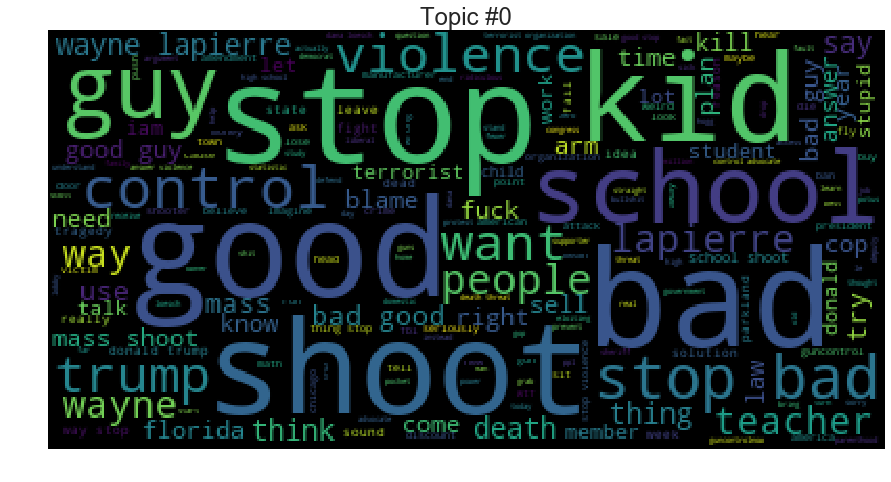

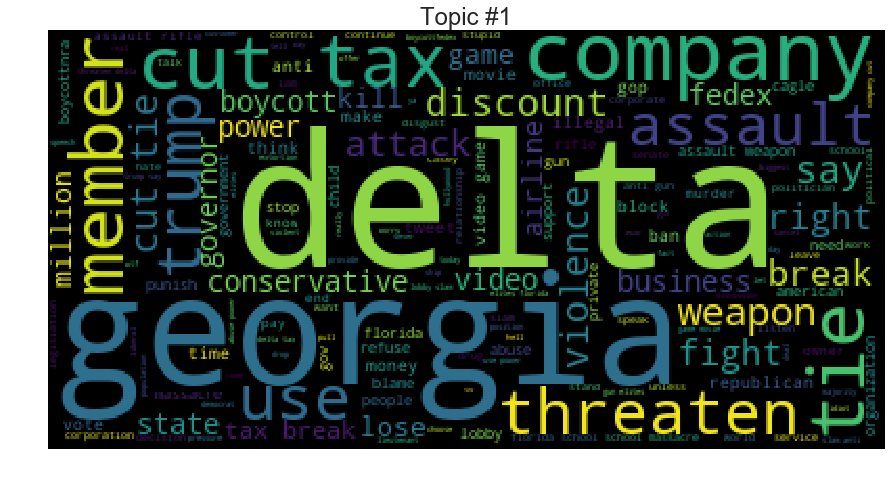

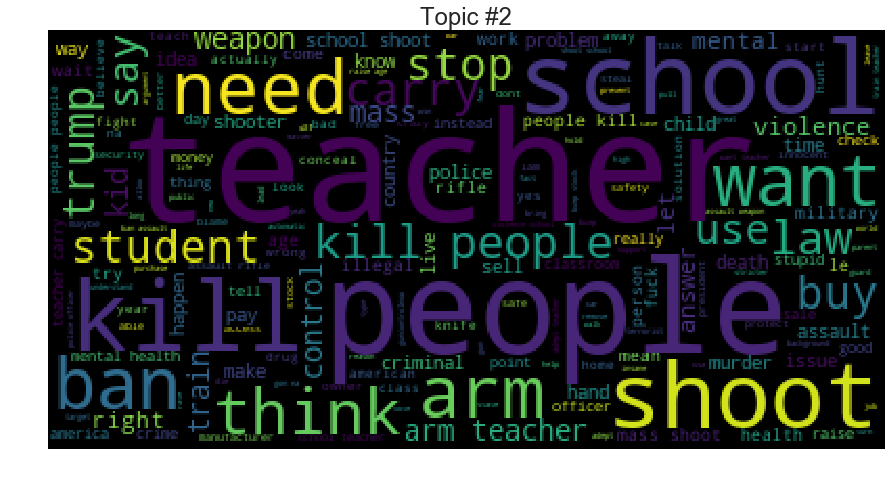

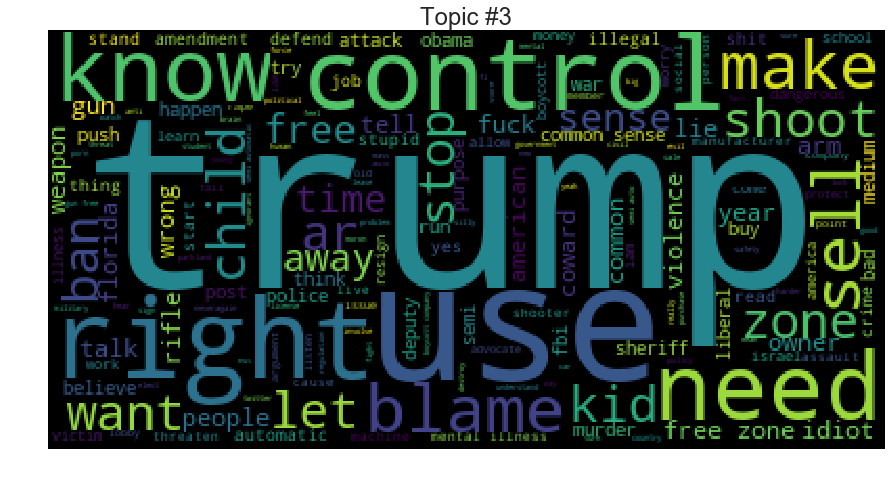

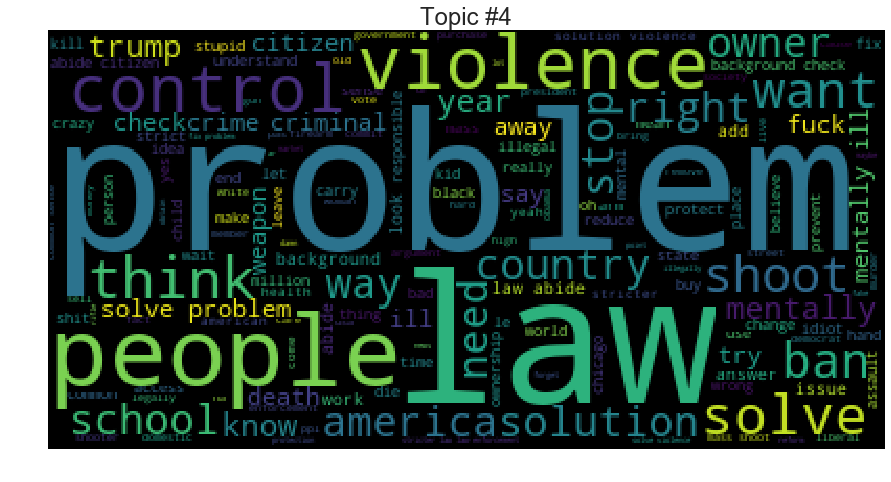

In [399]:
import matplotlib.pyplot as plt
for t in range(lda.num_topics):
    
    plt.figure(figsize=(15,10) )
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

### K-Means Clustering

#### Determine optimal k number of clusters

In [708]:

# try out a range of cluster sizes to find the one with the best inertia and silhouette scores
ns = np.arange(2, 20, 1)
inertias = []
silhouettes = []

for n in ns:
    kmeans = KMeans(n_clusters=n, init="k-means++")
    kmeans.fit(X_neg_reduced)
    inertias.append(kmeans.inertia_)
    labels = kmeans.labels_
    # only a sample was used to calculate silhouette score because of memory errors
    silhouettes.append(silhouette_score(X_neg_reduced, labels, metric='euclidean'))

KeyboardInterrupt: 

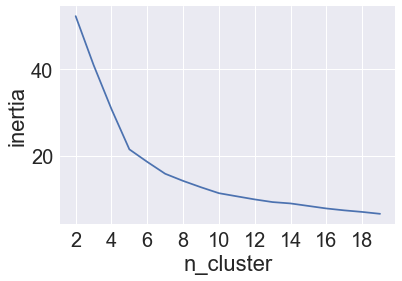

In [683]:
plt.plot(ns, inertias)
plt.xticks(np.arange(min(ns), max(ns)+1,2))
plt.xlabel('n_cluster')
plt.ylabel('inertia');

In [371]:
trace = go.Scatter(x=ns,y=inertias)
data = [trace]
layout = go.Layout(
    title='Inertia Score by Cluster Size',  titlefont=dict(
            
            size=20,
         
        ),
    yaxis = dict(title='Inertia Score',titlefont=dict(size=20)), 
    xaxis = dict(title='Cluster Size', titlefont=dict(size=20)))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jphan88/0 or inside your plot.ly account where it is named 'basic-line'


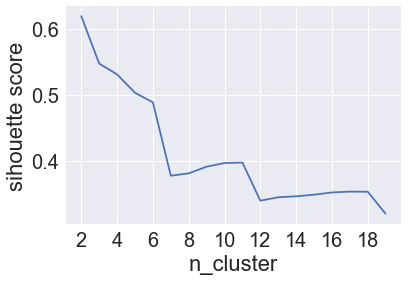

In [363]:
# plot the silhouettte scores
plt.plot(ns, silhouettes)
plt.xticks(np.arange(min(ns), max(ns)+1,2))
plt.xlabel('n_cluster')
plt.ylabel('sihouette score');

In [374]:
import plotly.plotly as py
trace = go.Scatter(x=ns,y=silhouettes)
data = [trace]
layout = go.Layout(
    title='Silhouette Score by Cluster Size',titlefont=dict(size=20),
    yaxis = dict(title='Cluster Size',titlefont=dict(size=20)),
    xaxis = dict(title='Silhouette Score',titlefont=dict(size=20)))
fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jphan88/0 or inside your plot.ly account where it is named 'basic-line'


In [475]:
#5 is the optimal cluster size as it is the elbow of the curve while obtaining a high silhouette score
kmeans = KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X_neg_reduced)
neg_labels = kmeans.labels_
print('Inertia Score: {}'.format(kmeans.inertia_))
print('Silhouette Score: {}'.format(silhouette_score(X_neg_reduced,neg_labels,metric='euclidean')))

Inertia Score: 13.642398638931281
Silhouette Score: 0.5642265620135883


In [709]:
kmeans = KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X_pos_reduced)
pos_labels = kmeans.labels_
print('Inertia Score: {}'.format(kmeans.inertia_))
print('Silhouette Score: {}'.format(silhouette_score(X_pos_reduced,pos_labels,metric='euclidean')))

Inertia Score: 8.869115263709912
Silhouette Score: 0.6943635454508679


In [ ]:
#Check how many tweets are in each cluster
for cluster in range(len(set(pos_labels))):
    print('Cluster {} has {} tweets.'.format(cluster,sum(pos_labels==cluster)))

In [376]:
neg

array(['',
       "'adding gasoline fire oilpatch investor lure south new u.s tax rule cbc news",
       "'conservative say 'gun nut 'kook 'lunatic 'mass-murdered-in-the-making ya use see happen mf worth ya really sure talk automatic weapon license hand jeech..wakey-wakey",
       ...,
       '\U0001f92c think two baby know shot sound school school safe place torture live fear sign',
       '🤷\u200d️🤷\u200d️ hey could fool', '\U0001f9d0wow lot hater'],
      dtype='<U251')

In [413]:
len(df_neg_reduced)

16517

In [476]:

df_neg_reduced = pd.DataFrame(X_neg_reduced)
df_neg_reduced['neg_tweets'] = neg
df_neg_reduced['neg_labels'] = neg_labels

In [477]:
df_neg_reduced.head(100)

0         1         2         3         4  \
0   0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.004099  0.031851  0.000000  0.002604  0.000000   
2   0.028670  0.000000  0.001211  0.000000  0.023659   
3   0.011468  0.014746  0.000000  0.011232  0.000110   
4   0.010975  0.023502  0.000000  0.010501  0.001251   
5   0.011468  0.014746  0.000000  0.011232  0.000110   
6   0.018128  0.006699  0.000000  0.015784  0.004709   
7   0.018135  0.000000  0.031029  0.017502  0.035960   
8   0.016043  0.041749  0.000000  0.020793  0.081519   
9   0.049784  0.000000  0.000000  0.000000  0.000000   
10  0.004749  0.000000  0.000000  0.000000  0.000000   
11  0.040472  0.000062  0.023070  0.002839  0.000000   
12  0.003806  0.000000  0.245389  0.000000  0.000000   
13  0.000000  0.000000  0.205035  0.000000  0.000000   
14  0.006143  0.000000  0.000000  0.000177  0.001365   
15  0.048520  0.000000  0.000000  0.000000  0.000000   
16  0.053399  0.000000  0.030857  0.000000  0.000000   
17  0.045093  0.000000  0.000000  0.004432  0.000000   
18  0.015632  0.012771  0.002148  0.000632  0.000142   
19  0.027612  0.000000  0.000182  0.000000  0.000000   
20  0.020077  0.000038  0.000000  0.000000  0.000000   
21  0.018636  0.000000  0.000000  0.000000  0.000000   
22  0.025178  0.000000  0.000000  0.013651  0.000000   
23  0.013184  0.018267  0.033625  0.000000  0.001834   
24  0.029206  0.016880  0.030168  0.000000  0.000771   
25  0.014788  0.043731  0.000000  0.000000  0.000000   
26  0.032774  0.014720  0.031473  0.000000  0.005258   
27  0.039805  0.000000  0.000000  0.000000  0.006641   
28  0.021403  0.000000  0.000000  0.000000  0.005204   
29  0.018278  0.034605  0.000000  0.005545  0.000000   
30  0.012042  0.000436  0.000000  0.004499  0.000000   
31  0.019788  0.000000  0.000000  0.001198  0.000000   
32  0.013997  0.000000  0.046604  0.000000  0.001135   
33  0.027763  0.000000  0.000000  0.000000  0.004712   
34  0.000000  0.024554  0.055126  0.003653  0.009528   
35  0.025015  0.000000  0.002740  0.015076  0.000000   
36  0.042386  0.000000  0.000000  0.010742  0.000000   
37  0.031766  0.000000  0.002096  0.014248  0.023105   
38  0.020132  0.000000  0.000489  0.008338  0.000000   
39  0.010572  0.000000  0.000000  0.013022  0.000000   
40  0.010188  0.000000  0.000000  0.026648  0.118117   
41  0.032181  0.000000  0.000000  0.000000  0.080406   
42  0.028743  0.002990  0.000564  0.044435  0.014070   
43  0.049303  0.000000  0.057913  0.003805  0.000000   
44  0.026838  0.000000  0.062906  0.000000  0.000000   
45  0.014449  0.002351  0.031305  0.000377  0.005339   
46  0.005269  0.001463  0.098641  0.000000  0.005821   
47  0.007959  0.000000  0.003059  0.000000  0.000472   
48  0.000000  0.000000  0.000000  0.000000  0.135254   
49  0.000000  0.017149  0.000000  0.106101  0.000000   
50  0.034123  0.000000  0.000000  0.000000  0.000000   
51  0.034217  0.013082  0.030244  0.000000  0.043036   
52  0.031647  0.007656  0.000000  0.000000  0.000000   
53  0.026825  0.002882  0.076553  0.007810  0.014947   
54  0.016564  0.000000  0.000000  0.000000  0.000781   
55  0.000000  0.000235  0.000000  0.140684  0.055947   
56  0.000000  0.000000  0.000000  0.096318  0.050278   
57  0.022610  0.002424  0.089083  0.007714  0.000000   
58  0.020774  0.004486  0.117031  0.009723  0.000000   
59  0.013643  0.002482  0.000172  0.001636  0.004218   
60  0.018977  0.027652  0.000000  0.000000  0.002667   
61  0.018401  0.036987  0.001156  0.001147  0.000000   
62  0.041871  0.000000  0.052322  0.000000  0.000000   
63  0.013879  0.000000  0.001020  0.000000  0.003181   
64  0.027463  0.034887  0.000000  0.013571  0.028026   
65  0.022978  0.000000  0.000451  0.000000  0.000000   
66  0.033528  0.054070  0.023112  0.000000  0.000000   
67  0.077644  0.000000  0.000000  0.000000  0.000000   
68  0.034501  0.000000  0.004184  0.000000  0.006047   
69  0.028644  0.018523  0.000000  0.000000  0.001143   
70  0.019055  0.000000  0.000037  0

In [710]:
df_pos_reduced = pd.DataFrame(X_pos_reduced)
df_pos_reduced['pos_tweets'] = pos
df_pos_reduced['pos_labels'] = pos_labels

In [715]:
pos_cluster1 = list(df_pos_reduced[df_pos_reduced['pos_labels']==2].pos_tweets)
pos_cluster1_str = ','.join(pos_cluster1)

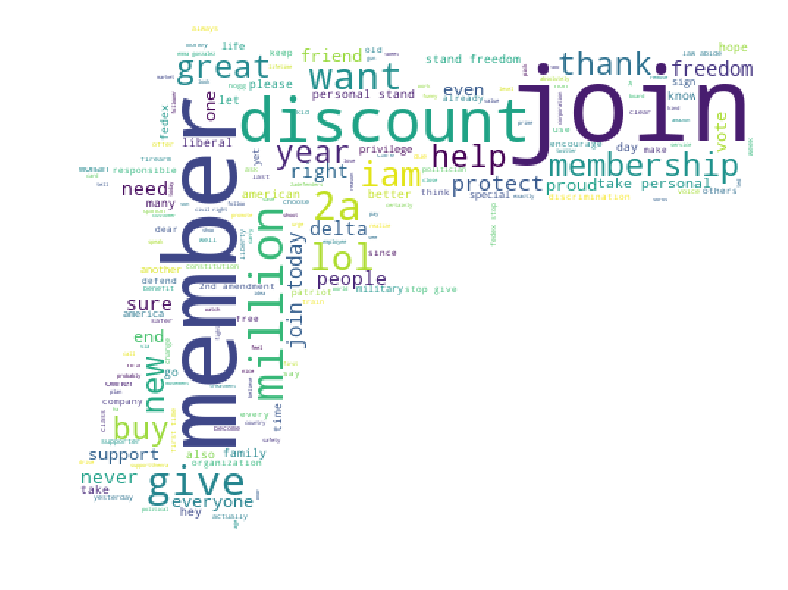

In [716]:
plt.figure( figsize=(15,8))
wordcloud = WordCloud(
        
                          background_color='white',mask=gun_mask,width=1500,height=1000
                          
                        ).generate(pos_cluster1_str)


# plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Cluster Clouds

In [385]:
neg_cluster1 = list(df_neg_reduced[df_neg_reduced['neg_labels']==0].neg_tweets)

In [386]:
neg_cluster1_str = ','.join(neg_cluster1)

In [387]:
import imageio
gun_mask = imageio.imread('gun.jpg')

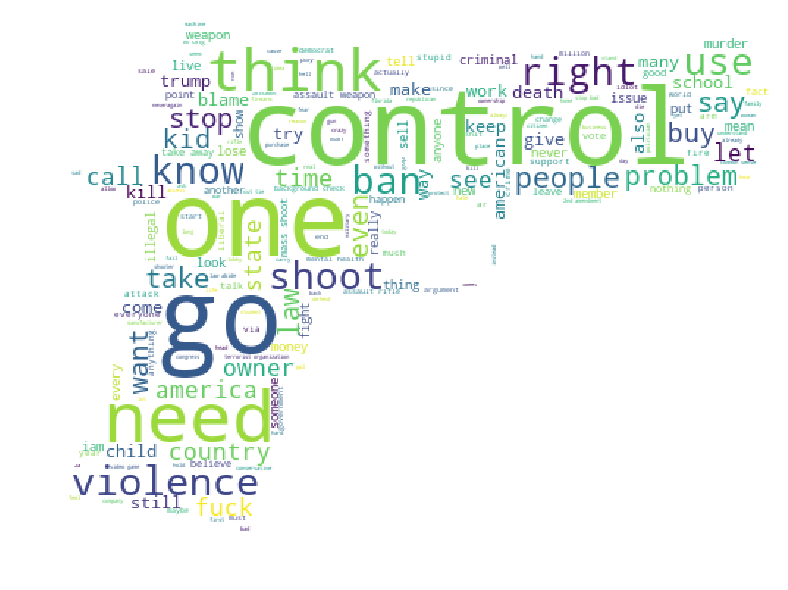

In [480]:
plt.figure( figsize=(15,8))
wordcloud = WordCloud(
        
                          background_color='white',mask=gun_mask,width=1500,height=1000
                          
                        ).generate(neg_cluster1_str)


# plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [391]:
neg_cluster2 = list(df_neg_reduced[df_neg_reduced['neg_labels']==1].neg_tweets)
neg_cluster2_str = ','.join(neg_cluster2)

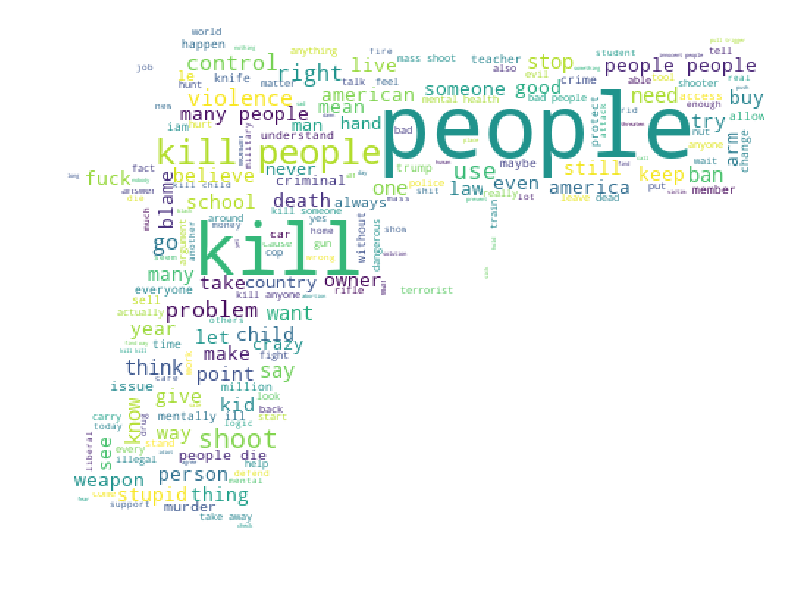

In [481]:
plt.figure( figsize=(15,8))
wordcloud = WordCloud(
        
                          background_color='white',mask=gun_mask,width=1500,height=1000
                          
                        ).generate(neg_cluster2_str)


# plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [717]:
tweet_orig[-5000:]

['Wow , "only" four more notches on your gun! I know you will tell us more guns are the answer. Remember reading when "bleeding" was a medical answer? They finally noticed it was killing folks and it stopped. You will be remembered as our BLEEDERS!',
 "Do not let Congress pass gun control in the budget bill! They're trying to sneak it in! Ee them on the floor and call them out!",
 'Gun stores are NOT bound by the Constitution to ensure you have a firearm . Your 2A right is not to be Infringed upon by the GOVERNMENT. a business can deny you service for any reason. I LOVE the 2A, but govt shouldn’t be able 2 force someone to sell you something, is my point.',
 'You should be able to buy a gun if you can enlist in the millitary and vote along with being allowed to drink a beer',
 'There is never a gun battle with each side having equal fire power #Yountville',
 'Fortnite Fun With a Gun #1 via',
 'Wow - sounds so conspiratorial - hope no one got hurt by a gun.',
 'These stories sound real 

In [496]:
df_test[df_test['cln']=='caucasian arm permit student shoot kill comply law police officer victim age 43']

cln  \
46360  caucasian arm permit student shoot kill comply law police officer victim age 43   

                                                                                                                        orig  
46360  Caucasian armed with gun permit student shot and killed after complying with the law by police officer. victim age 43

In [488]:
df_neg_reduced[df_neg_reduced['neg_labels']==1][-10000:]

0         1         2         3         4  \
8      0.016043  0.041749  0.000000  0.020793  0.081519   
40     0.010188  0.000000  0.000000  0.026648  0.118117   
41     0.032181  0.000000  0.000000  0.000000  0.080406   
48     0.000000  0.000000  0.000000  0.000000  0.135254   
84     0.018884  0.000000  0.000000  0.000000  0.053281   
98     0.019043  0.004430  0.000000  0.006502  0.062810   
103    0.007772  0.000000  0.000000  0.000000  0.088707   
133    0.018838  0.000000  0.000000  0.000000  0.053702   
146    0.022068  0.000000  0.000000  0.004863  0.103741   
163    0.022742  0.000000  0.029473  0.000000  0.046551   
172    0.011365  0.005552  0.024413  0.012871  0.083455   
188    0.014807  0.000000  0.000700  0.000000  0.092416   
192    0.024249  0.000000  0.031287  0.005348  0.065363   
197    0.000000  0.000000  0.000000  0.000000  0.194892   
200    0.000000  0.004827  0.000000  0.017633  0.067736   
206    0.000000  0.000000  0.000171  0.045752  0.062207   
208    0.004165  0.007542  0.001090  0.000000  0.086048   
236    0.000000  0.034435  0.000000  0.027572  0.115177   
255    0.000000  0.002553  0.000086  0.006486  0.056678   
273    0.022354  0.009487  0.000000  0.000000  0.079208   
290    0.014160  0.000000  0.000000  0.000000  0.096030   
294    0.011649  0.000000  0.007629  0.009591  0.076792   
300    0.014946  0.002832  0.052449  0.000000  0.073360   
302    0.014227  0.000000  0.000000  0.036305  0.047680   
303    0.007404  0.001862  0.000228  0.000000  0.060117   
308    0.023827  0.000000  0.000000  0.000000  0.104740   
309    0.017660  0.001811  0.005842  0.000000  0.052662   
334    0.023904  0.000753  0.001647  0.004749  0.051111   
340    0.016571  0.000000  0.003377  0.000000  0.049508   
348    0.024133  0.000000  0.000000  0.047923  0.059286   
366    0.001713  0.000000  0.000000  0.019872  0.111850   
378    0.020252  0.004463  0.000000  0.006388  0.045935   
390    0.005490  0.006507  0.000000  0.000000  0.066449   
413    0.017177  0.000000  0.000000  0.000000  0.053660   
457    0.030938  0.000000  0.000596  0.005694  0.070213   
482    0.017018  0.000000  0.004351  0.000205  0.047463   
489    0.018436  0.000000  0.000000  0.000000  0.136778   
524    0.020139  0.007400  0.000000  0.000806  0.092440   
531    0.012505  0.003401  0.000847  0.058268  0.074891   
533    0.017356  0.000000  0.026981  0.000000  0.081084   
534    0.004182  0.000000  0.000000  0.000000  0.121468   
539    0.015461  0.000000  0.055340  0.007408  0.060220   
573    0.002662  0.000000  0.000000  0.000000  0.060899   
603    0.004044  0.048061  0.073302  0.000000  0.117836   
607    0.008954  0.012343  0.000000  0.000000  0.093332   
618    0.000000  0.005378  0.000000  0.016456  0.109918   
655    0.021870  0.000000  0.030117  0.000000  0.044894   
656    0.007652  0.000000  0.000442  0.017394  0.114409   
670    0.007153  0.000000  0.000000  0.062491  0.078940   
674    0.023869  0.000000  0.000000  0.000000  0.057517   
688    0.025624  0.000000  0.029373  0.001475  0.076503   
693    0.000000  0.011084  0.000000  0.020524  0.122098   
724    0.010428  0.000000  0.034551  0.049503  0.070504   
743    0.015522  0.050151  0.000000  0.006790  0.084371   
763    0.029781  0.000000  0.000000  0.000000  0.070237   
768    0.016766  0.000000  0.000000  0.000000  0.105259   
780    0.007226  0.000000  0.000000  0.000193  0.071436   
796    0.022416  0.000000  0.000979  0.000622  0.047877   
819    0.015919  0.000000  0.000333  0.000000  0.102049   
833    0.012496  0.000000  0.000000  0.000000  0.075026   
838    0.020099  0.000000  0.000000  0.018865  0.133291   
840    0.022631  0.000000  0.000000  0.014623  0.075389   
848    0.001625  0.004011  0.004220  0.000000  0.066288   
864    0.020393  0.004130  0.000000  0.001181  0.068479   
870    0.020774  0.009356  0.026756  0.006113  0.091904   
886    0.024937  0.002335  0.000037  0.010613  0.049463   
891    0.015803  0.033596  0.000000  0.000000  0.072902   
90

In [395]:
neg_cluster3 = list(df_neg_reduced[df_neg_reduced['neg_labels']==2].neg_tweets)
neg_cluster3_str = ','.join(neg_cluster3)

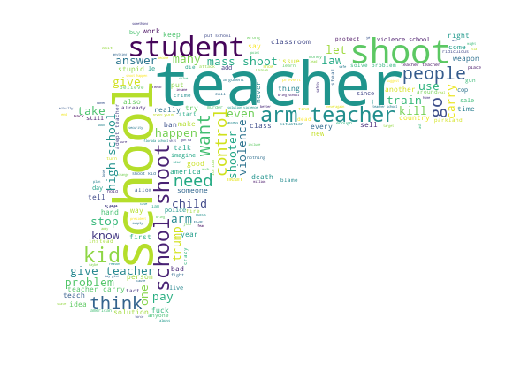

In [401]:
plt.figure( figsize=(8,5))
wordcloud = WordCloud(
        
                          background_color='white',mask=gun_mask,width=1500,height=1000
                          
                        ).generate(neg_cluster3_str)


# plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [397]:
neg_cluster4 = list(df_neg_reduced[df_neg_reduced['neg_labels']==3].neg_tweets)
neg_cluster4_str = ','.join(neg_cluster4)

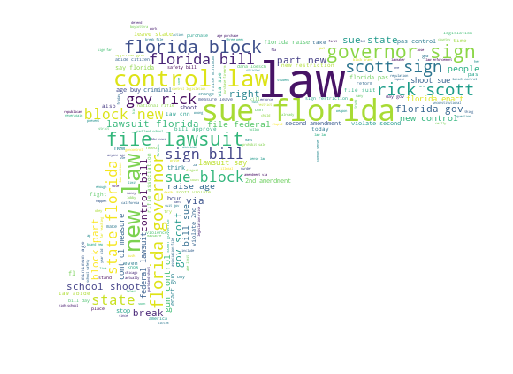

In [400]:
plt.figure( figsize=(8,5))
wordcloud = WordCloud(
        
                          background_color='white',mask=gun_mask,width=1500,height=1000
                          
                        ).generate(neg_cluster4_str)


# plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [478]:
neg_cluster5 = list(df_neg_reduced[df_neg_reduced['neg_labels']==4].neg_tweets)

neg_cluster5_str = ','.join(neg_cluster5)

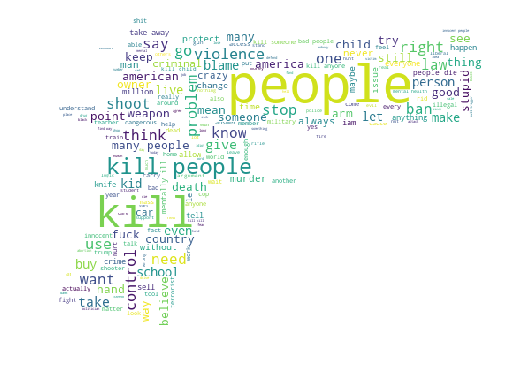

In [479]:
plt.figure( figsize=(8,5))
wordcloud = WordCloud(
        
                          background_color='white',mask=gun_mask,width=1500,height=1000
                          
                        ).generate(neg_cluster5_str)


# plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [394]:

for t in range(nmf.num_topics):
    
    plt.figure(figsize=(15,10) )
    
    plt.imshow(WordCloud().fit_words(dict(kmeans.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

AttributeError: 'NMF' object has no attribute 'num_topics'

In [ ]:
pos_clus1 = list(df_)

In [ ]:
# visualize positive review cluster 1
negative_cluster0 = list(df_negative_reduced[df_negative_reduced.negative_labels==1].negative_reviews)
create_wordcloud(negative_cluster0, thumbsdown_mask, "negative_cluster0.png", n_words=100)

In [772]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3,perplexity=40,n_iter=500)
tsne_neg = tsne.fit_transform(X_neg_reduced)
df_tsne_neg = pd.DataFrame(tsne_neg,columns=['tsne_x','tsne_y','tsne_z'])
df_tsne_neg.shape
df_tsne_neg['Cluster'] = neg_labels

In [ ]:
df_tsne_neg

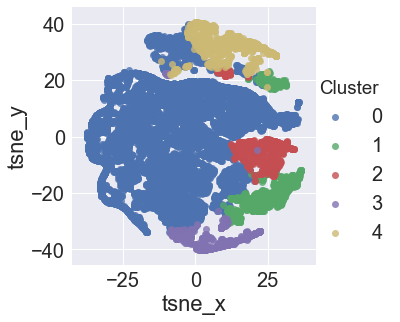

In [521]:
tsne_neg = sns.lmplot('tsne_x','tsne_y', data=df_tsne_neg,fit_reg=False,hue='Cluster')

In [765]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=2,
    init='pca', # pca
#     random_state=101,
    method='barnes_hut',
    n_iter=300,
    verbose=2,
    angle=0.5
).fit_transform(X_neg_reduced)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16517 samples in 0.053s...
[t-SNE] Computed neighbors for 16517 samples in 1.549s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16517
[t-SNE] Computed conditional probabilities for sample 2000 / 16517
[t-SNE] Computed conditional probabilities for sample 3000 / 16517
[t-SNE] Computed conditional probabilities for sample 4000 / 16517
[t-SNE] Computed conditional probabilities for sample 5000 / 16517
[t-SNE] Computed conditional probabilities for sample 6000 / 16517
[t-SNE] Computed conditional probabilities for sample 7000 / 16517
[t-SNE] Computed conditional probabilities for sample 8000 / 16517
[t-SNE] Computed conditional probabilities for sample 9000 / 16517
[t-SNE] Computed conditional probabilities for sample 10000 / 16517
[t-SNE] Computed conditional probabilities for sample 11000 / 16517
[t-SNE] Computed conditional probabilities for sample 12000 / 16517
[t-SNE] Computed conditional probabilities for sam

In [745]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    showlegend=True,
    marker=dict(
       size=12,
       color=df_tsne_neg['Cluster'],              # set color to an array/list of desired values
       colorscale='Viridis',   # choose a colorscale
       opacity=0.8
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='Text Similarity')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [767]:

tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=824)
tsne_negative = tsne.fit_transform(X_neg_reduced)

In [768]:
df_tsne_negative = pd.DataFrame(tsne_negative, columns=["tsne_x", "tsne_y"])
df_tsne_negative["Cluster"] = neg_labels
df_tsne_negative.shape

(16517, 3)

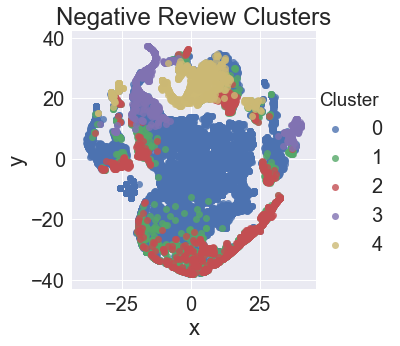

In [769]:

# visualize the negative review clusters using t-SNE
tsne_negative = sns.lmplot("tsne_x", "tsne_y",data=df_tsne_negative, fit_reg=False, hue="Cluster")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Negative Review Clusters");

In [755]:
df_tsne_negative

tsne_x     tsne_y  Cluster
0     -22.168903 -10.078808  0      
1     -8.062149   11.601473  0      
2     -8.001159  -22.853466  0      
3     -2.740196   6.674543   0      
4     -3.321542   7.714986   0      
5     -2.740309   6.674548   0      
6     -35.926510  1.454541   0      
7      15.335725  20.396261  0      
8     -25.720892  7.360552   1      
9     -3.825223  -24.976229  0      
10    -22.168903 -10.078808  0      
11     22.907791  14.979508  0      
12    -9.939375   25.346577  4      
13    -9.351920   24.555176  4      
14     16.842953 -7.015595   0      
15     3.869732  -25.114777  0      
16     10.708565  21.936159  0      
17     4.050816  -24.691900  0      
18    -5.681960   8.660454   0      
19    -36.527206  6.223882   0      
20     11.081692 -4.852468   0      
21     7.830900  -9.426621   0      
22    -7.322329  -29.534399  0      
23    -3.815720   32.128006  0      
24     25.337147  18.899672  0      
25    -15.083042  18.858009  0      
26    -2.384184   34.012474  0      
27    -0.900906  -19.043375  0      
28    -1.980546  -8.943653   0      
29    -18.546616  16.563856  0      
30     15.653990  4.744076   0      
31     2.664811  -8.366823   0      
32     2.030773   27.291941  4      
33    -1.021395  -9.066731   0      
34     0.448963   29.618977  4      
35    -9.114548  -20.640070  0      
36    -9.742303  -30.268755  0      
37    -0.212933  -33.165962  0      
38     6.340603  -17.084026  0      
39     14.878248 -18.042807  0      
40    -23.056314 -2.280008   1      
41    -8.918580  -29.506634  1      
42     28.199781 -6.980350   2      
43     20.494221  17.700047  4      
44     2.742616   25.554947  4      
45     8.365370   28.719757  0      
46    -6.078948   20.063606  4      
47     20.525652 -12.053774  0      
48    -4.579267  -36.474785  1      
49    -18.762243  1.498987   2      
50    -11.449461 -8.098727   0      
51    -27.862528  17.286865  0      
52    -10.037103  1.096628   0      
53     20.261717  18.333258  4      
54     1.310062  -6.200324   0      
55     32.080498 -13.013752  2      
56     31.519276 -13.574607  2      
57     20.330072  18.472767  4      
58     20.200428  18.652134  4      
59     6.860499   5.239527   0      
60    -17.228962  15.195887  0      
61    -15.079872  14.387418  0      
62     9.233736   24.480698  4      
63     10.042010  0.910423   0      
64    -26.775011  8.756667   0      
65    -1.971890  -1.333604   0      
66    -6.724439   32.652134  0      
67     30.660469 -6.025346   0      
68    -4.474022  -17.524733  0      
69     37.547363  3.320326   0      
70    -34.745956  13.152412  0      
71     5.798034   26.016222  0      
72    -22.193214 -9.455222   0      
73    -22.664206 -9.802483   0      
74    -17.474136 -15.636058  0      
75    -17.931776  17.147121  0      
76    -7.124850  -9.258044   0      
77     2.796889   0.549798   0      
78     6.192539   21.941961  4      
79     0.774355   29.703133  0      
80    -7.967374  -3.970126   0      
81     7.107652  -6.031155   0      
82    -24.908459  2.451507   0      
83     18.373550 -4.013606   0      
84     13.355832 -31.775135  1      
85     13.697962  7.702872   0      
86     5.688568   13.848884  0      
87     0.449099  -33.110748  2      
88     28.720589  14.109650  0      
89    -2.812578  -28.634274  0      
90     21.213158  9.406868   0      
91    -22.664206 -9.802483   0      
92    -4.332166   31.384287  0      
93    -4.303550   18.875589  4      
94     10.162629 -16.302910  0      
95    -2.425195   4.686047   0      
96    -13.749877 -27.326195  2      
97     1.497411  -3.031227   0      
98     29.181122 -6.535951   1      
99     6.016341   14.321249  0      
100    20.522573 -11.465248  0      
101    1.471210   5.305024   0      
102    5.731459  -18.029547  0      
103   -5.115246  -36.209965  1      
104    30.153170  12.157737  0      
105   -14.068439 -19.928747  0      
106    23.540224  18.305693  0      
107    9.96457

In [773]:
trace1 = go.Scatter3d(
    x=df_tsne_neg['tsne_x'],
    y=df_tsne_neg['tsne_y'],
    z=df_tsne_neg['tsne_z'],
    mode='markers',
    showlegend=True,
    marker=dict(
       size=12,
       color=df_tsne_neg['Cluster'],              # set color to an array/list of desired values
       colorscale='Viridis',   # choose a colorscale
       opacity=0.8
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='Text Similarity')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

### Hierarchical Document Clustering

In [407]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage

In [408]:
dist_cosine = 1 - cosine_similarity(X_pos)

NameError: name 'X_pos' is not defined

In [ ]:
Z = linkage(dist_cosine,'average')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [ ]:
c, coph_dists = cophenet(Z,pdist(dist_cosine))
c

In [ ]:
Z[:20]

In [ ]:
pos

In [ ]:
Word2Vec(pos)

In [ ]:
texts = [[word for word in sent.split()]
         for sent in pos]

In [ ]:
texts

In [ ]:
import gensim
model = gensim.models.Word2Vec(texts[0:20], min_count=3)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
ax = dendrogram(linkage_matrix,orientation='right',labels=pos);
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
plt.tight_layout()

In [ ]:
plt.tick_params( axis='x',which='both',bottom='off',)

### DBSCAN

In [ ]:
dbscan = DBSCAN(eps=.02,min_samples=5,metric='cosine')

In [ ]:
dbscan.fit(X_pos_reduced)

In [ ]:
dbscan.

In [ ]:
plot_clusters(X_pos_reduced,cluster.DBSCAN,(),{'eps':.025})

### 2nd LDA Model with Visualization

In [ ]:
#dictionary = corpora.Dictionary(tweet_cln_list)

In [ ]:
#corpus_viz = [dictionary.doc2bow(doc) for doc in tweet_cln_list]

In [ ]:
#lda_model = models.LdaModel(num_topics=8, minimum_probability=.03, id2word=dictionary,passes=10)

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
#### TFID Vectorizer#percentage of the words in a sentence - usually used to compare sentences of different length 
#your name in a tweet vs. your name in a book
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(min_df=1000,use_idf=True,ngram_range=(1,2))
matrix_tfid = vec.fit_transform(tweet_cln)
#Inverse document frequency

idf_df = pd.DataFrame(matrix_tfid.toarray(), columns=vec.get_feature_names())

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_tf = LatentDirichletAllocation(n_topics=8, random_state=0)
lda_tf.fit(matrix_tfid)

In [ ]:
pyLDAvis.sklearn.prepare(lda_tf,matrix_tfid,vec)

#### Making a prediction

In [ ]:
Y = vec.transform(['nra,amendment'])

In [ ]:
prediction = km.predict(Y)
print(prediction)

In [ ]:
'''Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure 
of similarity between each document and the other documents in the corpus (each synopsis among the synopses). 
Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.'''

In [ ]:
#Find the distance be
dist = 1 - cosine_similarity(matrix_tfid)

In [ ]:
dist_rd = np.round(dist,2)

#### Pickle the K-Means Model

In [ ]:
from sklearn.externals import joblib
# joblib.dump(km,'km_model.pkl')

#### Open the K-Means Model

In [ ]:
km = joblib.load('km_model.pkl')


#### Finding optimal K Clusters

In [ ]:
np.mean(matrix_tfid[labels==7],axis=0)

In [ ]:
len(np.unique(labels))

In [ ]:
def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

In [ ]:
# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [ ]:
SSEs = []
Sil_coefs = []
for k in range(2,4):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(matrix_tfid)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(matrix_tfid, labels, metric='cosine'))
    SSEs.append(get_SSE(matrix_tfid, labels)) # The SSE is just inertia, we
                                            # could have just said km.inertia_

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

In [ ]:
tfidf_terms

In [ ]:
get_cluster(terms, 2)